In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Day 1 - Mission statement:

# Exploring the data
# Data cleaning
    # checking for null values
    # uniformizing column names and figuring out what the column names even meeeaaaaaaaaaaan
# checking the multicollinearity
# 
#
#

In [3]:
path = ('C:/Users/camil/Documents/Courses/Ironhack/Module 1/Week 6/data_mid_bootcamp_project_FIFA_MoneyBall/')
file = os.listdir(path)
file

['.git',
 '.ipynb_checkpoints',
 'acronyms.csv',
 'FIFA project - Data Cleaning and EDA.ipynb',
 'FIFA project - exploring the data (num version).ipynb',
 'FIFA project - Modeling (num version).ipynb',
 'fifa21_male2.csv',
 'positions - Copy.csv',
 'positions.csv',
 'project_details.md']

In [4]:
data = pd.DataFrame()
for file in file:
    if file.endswith('2.csv'):
        data = pd.read_csv(path + file)       
data.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  ...  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png  ...   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png  ...   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png  ...   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png  ...   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png  ...   

     CDM    RDM    RWB     LB   LCB    CB   RCB     RB    GK Gender  
0  70+-1  70+-1  71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0   Male  
1   66+1   66+1   62+1   60+1  60+1  60+1  60+1   60+1  17+1   Male  
2   54+0   54+0   52+0   47+0  46+0  46+0  46+0   47+0  15+0   Male  
3   65+0   65+0   56+0   57+0  51+0  51+0  51+0   57+0  22+0   Male  
4   73+3   73+3   70+3   67+3  64+3  64+3  64+3   67+3  17+3   Male  

[5 rows x 107 columns]

In [14]:
pd.set_option('display.max_columns', None)

In [5]:
data.shape

(17125, 107)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [7]:
data.describe()

ID           Age           OVA           BOV           POT  \
count   17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean   219388.716204     25.272934     66.965022     67.900204     72.489810   
std     37499.197507      4.942665      6.864329      6.637538      5.769949   
min         2.000000     16.000000     38.000000     42.000000     47.000000   
25%    204082.000000     21.000000     62.000000     64.000000     69.000000   
50%    228961.000000     25.000000     67.000000     68.000000     72.000000   
75%    243911.000000     29.000000     72.000000     72.000000     76.000000   
max    259105.000000     53.000000     93.000000     93.000000     95.000000   

             Growth     Attacking      Crossing     Finishing  \
count  17125.000000  17125.000000  17125.000000  17125.000000   
mean       5.524788    258.537752     51.621314     47.956672   
std        5.787539     72.255687     17.875715     19.391547   
min       -1.000000     33.000000      6.000000      3.000000   
25%        0.000000    232.000000     41.000000     33.000000   
50%        4.000000    271.000000     56.000000     52.000000   
75%        9.000000    306.000000     65.000000     64.000000   
max       26.000000    437.000000     94.000000     95.000000   

       Heading Accuracy  ...  GK Positioning   GK Reflexes   Total Stats  \
count      17125.000000  ...    17125.000000  17125.000000  17125.000000   
mean          53.598832  ...       15.514277     15.738628   1631.256175   
std           16.947164  ...       16.406064     17.130908    260.357024   
min            5.000000  ...        1.000000      1.000000    731.000000   
25%           46.000000  ...        8.000000      8.000000   1492.000000   
50%           57.000000  ...       11.000000     11.000000   1659.000000   
75%           65.000000  ...       14.000000     14.000000   1812.000000   
max           93.000000  ...       93.000000     90.000000   2316.000000   

         Base Stats           PAC           SHO           PAS           DRI  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean     361.372146     68.091620     54.967299     58.926540     64.209869   
std       40.252290     11.147116     13.877605     10.186728      9.832734   
min      228.000000     25.000000     16.000000     25.000000     28.000000   
25%      333.000000     62.000000     46.000000     52.000000     59.000000   
50%      362.000000     69.000000     58.000000     60.000000     65.000000   
75%      390.000000     75.000000     65.000000     66.000000     71.000000   
max      498.000000     96.000000     93.000000     93.000000     95.000000   

                DEF           PHY  
count  17125.000000  17125.000000  
mean      50.266102     64.910715  
std       16.853801      9.660260  
min       12.000000     27.000000  
25%       35.000000     59.000000  
50%       53.000000     66.000000  
75%       64.000000     72.000000  
max       91.000000     93.000000  

[8 rows x 55 columns]

In [12]:
data.columns = [column.lower().replace(" ", "_").replace("&","and") for column in data.columns] 
data.head()

id         name  age  ova            nationality           club  bov   bp  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position                                       player_photo  ...  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png  ...   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png  ...   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png  ...   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png  ...   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png  ...   

     cdm    rdm    rwb     lb   lcb    cb   rcb     rb    gk gender  
0  70+-1  70+-1  71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0   Male  
1   66+1   66+1   62+1   60+1  60+1  60+1  60+1   60+1  17+1   Male  
2   54+0   54+0   52+0   47+0  46+0  46+0  46+0   47+0  15+0   Male  
3   65+0   65+0   56+0   57+0  51+0  51+0  51+0   57+0  22+0   Male  
4   73+3   73+3   70+3   67+3  64+3  64+3  64+3   67+3  17+3   Male  

[5 rows x 107 columns]

In [13]:
for col_name in data.columns: 
    print(col_name)

id
name
age
ova
nationality
club
bov
bp
position
player_photo
club_logo
flag_photo
pot
team_and_contract
height
weight
foot
growth
joined
loan_date_end
value
wage
release_clause
contract
attacking
crossing
finishing
heading_accuracy
short_passing
volleys
skill
dribbling
curve
fk_accuracy
long_passing
ball_control
movement
acceleration
sprint_speed
agility
reactions
balance
power
shot_power
jumping
stamina
strength
long_shots
mentality
aggression
interceptions
positioning
vision
penalties
composure
defending
marking
standing_tackle
sliding_tackle
goalkeeping
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes
total_stats
base_stats
w/f
sm
a/w
d/w
ir
pac
sho
pas
dri
def
phy
hits
ls
st
rs
lw
lf
cf
rf
rw
lam
cam
ram
lm
lcm
cm
rcm
rm
lwb
ldm
cdm
rdm
rwb
lb
lcb
cb
rcb
rb
gk
gender


In [20]:
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(col, ": ", data[col].isna().sum(), "NaN")

club :  23 NaN
position :  413 NaN
club_logo :  23 NaN
joined :  58 NaN
loan_date_end :  16215 NaN
volleys :  58 NaN
curve :  58 NaN
agility :  58 NaN
balance :  58 NaN
jumping :  58 NaN
interceptions :  7 NaN
positioning :  7 NaN
vision :  58 NaN
composure :  423 NaN
sliding_tackle :  58 NaN
a/w :  89 NaN
d/w :  89 NaN


In [21]:
data[data.columns[data.isna().any()]]

club      position  \
0            Udinese            LM   
1          KAS Eupen    CM CAM CDM   
2      Coventry City  CAM RM RW LM   
3         Sunderland           NaN   
4        Vissel Kobe        CM CAM   
...              ...           ...   
17120     CD Tondela            CB   
17121        Burnley        CAM CM   
17122        Burnley            RB   
17123  SK Sturm Graz         RB LB   
17124          Lecce            ST   

                                              club_logo        joined  \
0          https://cdn.sofifa.com/teams/55/light_60.png   Jul 1, 2008   
1        https://cdn.sofifa.com/teams/2013/light_60.png  Jul 19, 2014   
2        https://cdn.sofifa.com/teams/1800/light_60.png   Jan 7, 2016   
3         https://cdn.sofifa.com/teams/106/light_60.png           NaN   
4      https://cdn.sofifa.com/teams/101146/light_60.png  Jul 16, 2018   
...                                                 ...           ...   
17120  https://cdn.sofifa.com/teams/112516/light_60.png  Sep 29, 2020   
17121    https://cdn.sofifa.com/teams/1796/light_60.png  Aug 20, 2020   
17122    https://cdn.sofifa.com/teams/1796/light_60.png  Aug 20, 2020   
17123     https://cdn.sofifa.com/teams/209/light_60.png  Sep 30, 2020   
17124     https://cdn.sofifa.com/teams/347/light_60.png  Sep 30, 2020   

      loan_date_end  volleys  curve  agility  balance  jumping  interceptions  \
0               NaN     58.0   65.0     68.0     68.0     68.0           69.0   
1               NaN     68.0   79.0     62.0     72.0     54.0           71.0   
2               NaN     75.0   84.0     71.0     75.0     58.0           39.0   
3               NaN      NaN    NaN      NaN      NaN      NaN           70.0   
4               NaN     79.0   80.0     79.0     75.0     40.0           70.0   
...             ...      ...    ...      ...      ...      ...            ...   
17120  Jun 30, 2021     26.0   26.0     46.0     42.0     70.0           58.0   
17121           NaN     41.0   42.0     52.0     68.0     62.0           50.0   
17122           NaN     34.0   43.0     54.0     68.0     61.0           55.0   
17123           NaN     23.0   43.0     74.0     77.0     72.0           58.0   
17124           NaN     54.0   45.0     59.0     65.0     62.0           11.0   

       positioning  vision  composure  sliding_tackle     a/w     d/w  
0             63.0    66.0        NaN            69.0  Medium    High  
1             72.0    73.0       79.0            40.0  Medium  Medium  
2             69.0    74.0        NaN            30.0  Medium     Low  
3             72.0     NaN        NaN             NaN     NaN     NaN  
4             78.0    93.0       89.0            56.0    High  Medium  
...            ...     ...        ...             ...     ...     ...  
17120         23.0    29.0       46.0            66.0  Medium  Medium  
17121         55.0    53.0       46.0            56.0  Medium  Medium  
17122         49.0    45.0       43.0            54.0  Medium  Medium  
17123         46.0    56.0       54.0            61.0    High  Medium  
17124         64.0    50.0       57.0            11.0    High  Medium  

[17125 rows x 17 columns]

In [22]:
round((data["loan_date_end"].isna().sum())/(len(data["loan_date_end"]))*100,0) # we can drop that column

95.0

In [24]:
# Are there other columns that can be dropped?
# # player_photo, club_logo, flag_photo, they are photo we don't need 
# # gender: should only be one unique value:
data['gender'].unique()

array(['Male'], dtype=object)

In [25]:
data = data.drop(["loan_date_end", "player_photo", "club_logo", "flag_photo", "gender"], axis=1)

In [26]:
data.shape

(17125, 102)

In [27]:
# Setting ID as the index but first checking that there are only unique values there
print(data.id.nunique())
print(len(data.id))

17125
17125


In [28]:
data = data.set_index('id')
data.head()

name  age  ova            nationality           club  bov   bp  \
id                                                                          
2   G. Pasquale   33   69                  Italy        Udinese   71  LWB   
16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
27      J. Cole   33   71                England  Coventry City   71  CAM   
36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

        position  pot          team_and_contract height  weight   foot  \
id                                                                       
2             LM   69        Udinese 2008 ~ 2016   6'0"  181lbs   Left   
16    CM CAM CDM   71      KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right   
27  CAM RM RW LM   71  Coventry City 2016 ~ 2020   5'9"  161lbs  Right   
36           NaN   82            Sunderland 2009  5'11"  165lbs  Right   
41        CM CAM   81    Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right   

    growth        joined  value  wage release_clause     contract  attacking  \
id                                                                             
2        0   Jul 1, 2008  €625K   €7K             €0  2008 ~ 2016        313   
16       0  Jul 19, 2014  €600K   €7K          €1.1M  2014 ~ 2019        337   
27       0   Jan 7, 2016  €1.1M  €15K             €0  2016 ~ 2020        337   
36      14           NaN     €0    €0             €0         2009        264   
41       0  Jul 16, 2018  €5.5M  €12K          €7.2M  2018 ~ 2021        367   

    crossing  finishing  heading_accuracy  short_passing  volleys  skill  \
id                                                                         
2         75         50                59             71     58.0    338   
16        68         64                61             76     68.0    369   
27        80         64                41             77     75.0    387   
36        54         70                60             80      NaN    255   
41        75         69                54             90     79.0    408   

    dribbling  curve  fk_accuracy  long_passing  ball_control  movement  \
id                                                                        
2          73   65.0           60            69            71       347   
16         69   79.0           79            71            71       305   
27         79   84.0           77            69            78       295   
36         68    NaN           46            64            77       176   
41         85   80.0           70            83            90       346   

    acceleration  sprint_speed  agility  reactions  balance  power  \
id                                                                   
2             68            74     68.0         69     68.0    347   
16            56            50     62.0         65     72.0    324   
27            48            42     71.0         59     75.0    284   
36            59            62      NaN         55      NaN    239   
41            61            56     79.0         75     75.0    297   

    shot_power  jumping  stamina  strength  long_shots  mentality  aggression  \
id                                                                              
2           74     68.0       69        68          68        320          72   
16          75     54.0       64        60          71        362          71   
27          72     58.0       29        56          69        317          69   
36          63      NaN       51        66          59        271          59   
41          67     40.0       58        62          70        370          58   

    interceptions  positioning  vision  penalties  composure  defending  \
id                                                                        
2            69.0         63.0    66.0         50        NaN        208   
16           71.0         72.0    73.0         7

In [29]:
# We want to rename the positions to make it more readable for us, as football laypersons
# So we get a csv file that we created and will turn into a dictionary
positions = pd.read_csv('C:/Users/camil/Documents/Courses/Ironhack/Module 1/Week 6/data_mid_bootcamp_project_FIFA_MoneyBall/positions.csv', header=None, index_col=0)
positions

1
0                              
ova               overall_score
bov                best_overall
bp                best_position
pot             potential_score
foot             preferred_foot
w/f                   weak_foot
sm                  skill_moves
a/w                    away_win
d/w                  draw_games
ir     international_reputation
pac                        pace
sho                    shooting
pas                     passing
dri                     dribble
def                      defend
phy                    physical
hits                       hits
ls                 left_striker
st                      striker
rs                right_striker
lw                  left_winger
lf                 left_forward
cf               center_forward
rf                right_forward
rw                 right_winger
lam     left_attacking_midfield
cam   center_attacking_midfield
ram    right_attacking_midfield
lm              left_midfielder
lcm        left_center_midfield
cm              center_midfield
rcm       right_center_midfield
rm             right_midfielder
lwb              left_wing_back
ldm     left_defensive_midfield
cdm   center_defensive_midfield
rdm    right_defensive_midfield
rwb             right_wing_back
lb                    left_back
lcb            left_center_back
cb                  center_back
rcb           right_center_back
rb                   right_back
gk                   goalkeeper

In [30]:
positions = positions.squeeze().to_dict()

In [31]:
positions

{'ova': 'overall_score',
 'bov': 'best_overall',
 'bp': 'best_position',
 'pot': 'potential_score',
 'foot': 'preferred_foot',
 'w/f': 'weak_foot',
 'sm': 'skill_moves',
 'a/w': 'away_win',
 'd/w': 'draw_games',
 'ir': 'international_reputation',
 'pac': 'pace',
 'sho': 'shooting',
 'pas': 'passing',
 'dri': 'dribble',
 'def': 'defend',
 'phy': 'physical',
 'hits': 'hits',
 'ls': 'left_striker',
 'st': 'striker',
 'rs': 'right_striker',
 'lw': 'left_winger',
 'lf': 'left_forward',
 'cf': 'center_forward',
 'rf': 'right_forward',
 'rw': 'right_winger',
 'lam': 'left_attacking_midfield',
 'cam': 'center_attacking_midfield',
 'ram': 'right_attacking_midfield',
 'lm': 'left_midfielder',
 'lcm': 'left_center_midfield',
 'cm': 'center_midfield',
 'rcm': 'right_center_midfield',
 'rm': 'right_midfielder',
 'lwb': 'left_wing_back',
 'ldm': 'left_defensive_midfield',
 'cdm': 'center_defensive_midfield',
 'rdm': 'right_defensive_midfield',
 'rwb': 'right_wing_back',
 'lb': 'left_back',
 'lcb': '

In [32]:
for column in data:
    if column in positions:
        data.rename(columns=positions, inplace=True)
data.head()

name  age  overall_score            nationality           club  \
id                                                                          
2   G. Pasquale   33             69                  Italy        Udinese   
16  Luis García   37             71                  Spain      KAS Eupen   
27      J. Cole   33             71                England  Coventry City   
36     D. Yorke   36             68  Trinidad &amp; Tobago     Sunderland   
41      Iniesta   36             81                  Spain    Vissel Kobe   

    best_overall best_position      position  potential_score  \
id                                                              
2             71           LWB            LM               69   
16            70            CM    CM CAM CDM               71   
27            71           CAM  CAM RM RW LM               71   
36            70            ST           NaN               82   
41            82           CAM        CM CAM               81   

            team_and_contract height  weight preferred_foot  growth  \
id                                                                    
2         Udinese 2008 ~ 2016   6'0"  181lbs           Left       0   
16      KAS Eupen 2014 ~ 2019  5'10"  143lbs          Right       0   
27  Coventry City 2016 ~ 2020   5'9"  161lbs          Right       0   
36            Sunderland 2009  5'11"  165lbs          Right      14   
41    Vissel Kobe 2018 ~ 2021   5'7"  150lbs          Right       0   

          joined  value  wage release_clause     contract  attacking  \
id                                                                     
2    Jul 1, 2008  €625K   €7K             €0  2008 ~ 2016        313   
16  Jul 19, 2014  €600K   €7K          €1.1M  2014 ~ 2019        337   
27   Jan 7, 2016  €1.1M  €15K             €0  2016 ~ 2020        337   
36           NaN     €0    €0             €0         2009        264   
41  Jul 16, 2018  €5.5M  €12K          €7.2M  2018 ~ 2021        367   

    crossing  finishing  heading_accuracy  short_passing  volleys  skill  \
id                                                                         
2         75         50                59             71     58.0    338   
16        68         64                61             76     68.0    369   
27        80         64                41             77     75.0    387   
36        54         70                60             80      NaN    255   
41        75         69                54             90     79.0    408   

    dribbling  curve  fk_accuracy  long_passing  ball_control  movement  \
id                                                                        
2          73   65.0           60            69            71       347   
16         69   79.0           79            71            71       305   
27         79   84.0           77            69            78       295   
36         68    NaN           46            64            77       176   
41         85   80.0           70            83            90       346   

    acceleration  sprint_speed  agility  reactions  balance  power  \
id                                                                   
2             68            74     68.0         69     68.0    347   
16            56            50     62.0         65     72.0    324   
27            48            42     71.0         59     75.0    284   
36            59            62      NaN         55      NaN    239   
41            61            56     79.0         75     75.0    297   

    shot_power  jumping  stamina  strength  long_shots  mentality  aggression  \
id                                                                              
2           74     68.0       69        68          68        320          72   
16          75     54.0       64        60          71        362          71   
27          72     58.0       29        56          69        317          69   
36          63      NaN       51        66          59   

In [33]:
# Cleaning the numerical data

In [34]:
# cleaning height
data['height']

id
2          6'0"
16        5'10"
27         5'9"
36        5'11"
41         5'7"
          ...  
259088     6'6"
259090    5'10"
259091     5'9"
259101     5'9"
259105    5'10"
Name: height, Length: 17125, dtype: object

In [35]:
# CLEANING THE HEIGHT
def convert_height(i):
    to_cm = 2.54
    x = i.replace("'"," ")
    x2 = x.replace('"','') 
    #have to do it in two part because different quote used for inch and foot which causes problem with the string
    y = x2.split()
    height = round(((float(y[0])*12)+float(y[1]))*to_cm,0)
    return height

In [36]:
data['height'] = data['height'].apply(convert_height)
data['height']

id
2         183.0
16        178.0
27        175.0
36        180.0
41        170.0
          ...  
259088    198.0
259090    178.0
259091    175.0
259101    175.0
259105    178.0
Name: height, Length: 17125, dtype: float64

In [37]:
# CLEANING THE WEIGHT
def clean_weight(i):
    x = float(i.replace('lbs',''))
    return x

In [38]:
data["weight"] = data["weight"].apply(clean_weight)
data["weight"]

id
2         181.0
16        143.0
27        161.0
36        165.0
41        150.0
          ...  
259088    165.0
259090    170.0
259091    154.0
259101    148.0
259105    154.0
Name: weight, Length: 17125, dtype: float64

In [39]:
# CLEANING VALUE
def clean_value(i):
    x = float(i.replace(".","").replace("€","").replace("K","000").replace("M","00000"))
    return x

In [40]:
data['value'] = data['value'].apply(clean_value)
data['value']

id
2          625000.0
16         600000.0
27        1100000.0
36              0.0
41        5500000.0
            ...    
259088     550000.0
259090     130000.0
259091     130000.0
259101     475000.0
259105     325000.0
Name: value, Length: 17125, dtype: float64

In [41]:
# CLEANING WAGE AND RELEASE CLAUSE
data['wage'] = data['wage'].apply(clean_value)
data['wage']

id
2          7000.0
16         7000.0
27        15000.0
36            0.0
41        12000.0
           ...   
259088     2000.0
259090     3000.0
259091     2000.0
259101     3000.0
259105     2000.0
Name: wage, Length: 17125, dtype: float64

In [42]:
data['release_clause'] = data['release_clause'].apply(clean_value)
data['release_clause']

id
2               0.0
16        1100000.0
27              0.0
36              0.0
41        7200000.0
            ...    
259088          0.0
259090     273000.0
259091     273000.0
259101     784000.0
259105     788000.0
Name: release_clause, Length: 17125, dtype: float64

In [43]:
# CLEANING THE POSITIONS
def cleaning_positions(i):
    x = float(i.replace("+",".").replace("-",""))
    return x

In [44]:
for col in data.loc[:, 'left_striker':'goalkeeper']:
    data[col] = data[col].apply(cleaning_positions)
data.head()

name  age  overall_score            nationality           club  \
id                                                                          
2   G. Pasquale   33             69                  Italy        Udinese   
16  Luis García   37             71                  Spain      KAS Eupen   
27      J. Cole   33             71                England  Coventry City   
36     D. Yorke   36             68  Trinidad &amp; Tobago     Sunderland   
41      Iniesta   36             81                  Spain    Vissel Kobe   

    best_overall best_position      position  potential_score  \
id                                                              
2             71           LWB            LM               69   
16            70            CM    CM CAM CDM               71   
27            71           CAM  CAM RM RW LM               71   
36            70            ST           NaN               82   
41            82           CAM        CM CAM               81   

            team_and_contract  height  weight preferred_foot  growth  \
id                                                                     
2         Udinese 2008 ~ 2016   183.0   181.0           Left       0   
16      KAS Eupen 2014 ~ 2019   178.0   143.0          Right       0   
27  Coventry City 2016 ~ 2020   175.0   161.0          Right       0   
36            Sunderland 2009   180.0   165.0          Right      14   
41    Vissel Kobe 2018 ~ 2021   170.0   150.0          Right       0   

          joined      value     wage  release_clause     contract  attacking  \
id                                                                             
2    Jul 1, 2008   625000.0   7000.0             0.0  2008 ~ 2016        313   
16  Jul 19, 2014   600000.0   7000.0       1100000.0  2014 ~ 2019        337   
27   Jan 7, 2016  1100000.0  15000.0             0.0  2016 ~ 2020        337   
36           NaN        0.0      0.0             0.0         2009        264   
41  Jul 16, 2018  5500000.0  12000.0       7200000.0  2018 ~ 2021        367   

    crossing  finishing  heading_accuracy  short_passing  volleys  skill  \
id                                                                         
2         75         50                59             71     58.0    338   
16        68         64                61             76     68.0    369   
27        80         64                41             77     75.0    387   
36        54         70                60             80      NaN    255   
41        75         69                54             90     79.0    408   

    dribbling  curve  fk_accuracy  long_passing  ball_control  movement  \
id                                                                        
2          73   65.0           60            69            71       347   
16         69   79.0           79            71            71       305   
27         79   84.0           77            69            78       295   
36         68    NaN           46            64            77       176   
41         85   80.0           70            83            90       346   

    acceleration  sprint_speed  agility  reactions  balance  power  \
id                                                                   
2             68            74     68.0         69     68.0    347   
16            56            50     62.0         65     72.0    324   
27            48            42     71.0         59     75.0    284   
36            59            62      NaN         55      NaN    239   
41            61            56     79.0         75     75.0    297   

    shot_power  jumping  stamina  strength  long_shots  mentality  aggression  \
id                                                                              
2           74     68.0       69        68          68        320          72   
16          75     54.0       64        60          71        362          71   
27          72     58.0       29        56          69        317          

In [46]:
# Checking that there are no numerical data still classified as object
for col in data.columns:
    print(col, ":", data[col].dtypes)
# hits is still an object, to be changed into numerical

name : object
age : int64
overall_score : int64
nationality : object
club : object
best_overall : int64
best_position : object
position : object
potential_score : int64
team_and_contract : object
height : float64
weight : float64
preferred_foot : object
growth : int64
joined : object
value : float64
wage : float64
release_clause : float64
contract : object
attacking : int64
crossing : int64
finishing : int64
heading_accuracy : int64
short_passing : int64
volleys : float64
skill : int64
dribbling : int64
curve : float64
fk_accuracy : int64
long_passing : int64
ball_control : int64
movement : int64
acceleration : int64
sprint_speed : int64
agility : float64
reactions : int64
balance : float64
power : int64
shot_power : int64
jumping : float64
stamina : int64
strength : int64
long_shots : int64
mentality : int64
aggression : int64
interceptions : float64
positioning : float64
vision : float64
penalties : int64
composure : float64
defending : int64
marking : int64
standing_tackle : int64
s

In [47]:
data['hits'] = pd.to_numeric(data['hits'], errors='coerce')
data['hits']

id
2           4.0
16          4.0
27         11.0
36          3.0
41        149.0
          ...  
259088      5.0
259090      5.0
259091      3.0
259101      5.0
259105      4.0
Name: hits, Length: 17125, dtype: float64

In [48]:
# CLEANING CATEGORICAL DATA
# starred data cleaning (you can also have one for loop if I think about it now, this is just how I went thinking about it)
star_columns = ['weak_foot', 'skill_moves', 'international_reputation']

# Check unique values
# Select only the first character from the string
# Convert data type from object to integer
# Check that the transformation was successful
for column in star_columns:
    print(data[column].unique())
    data[column] = data[column].str[0]
    data[column] = pd.to_numeric(data[column], errors='raise')
    print(data[column].dtypes)

['3 ★' '4 ★' '2 ★' '1 ★' '5 ★']
int64
['2★' '3★' '4★' '1★' '5★']
int64
['2 ★' '1 ★' '4 ★' '3 ★' '5 ★']
int64


In [49]:
data['nationality'].unique()
# remove &amp;
# change China PR to China
# DR Congo to Democratic Republic of the Congo
# DPR Korea to North Korea

array(['Italy', 'Spain', 'England', 'Trinidad &amp; Tobago', 'Germany',
       'Turkey', 'Wales', 'Republic of Ireland', 'Nigeria', 'Brazil',
       'Australia', 'Hungary', 'Argentina', 'Portugal', 'Netherlands',
       'France', 'Norway', 'Tunisia', 'Bulgaria', 'Poland',
       'United States', 'Mali', 'Finland', 'Iceland', 'Czech Republic',
       'Serbia', 'Sweden', 'Georgia', 'Denmark', 'Senegal', 'Israel',
       'Cameroon', 'Greece', 'Scotland', 'Ukraine', 'China PR',
       'Colombia', 'Belgium', 'Ivory Coast', 'Switzerland', 'Canada',
       'Chile', 'Peru', 'Paraguay', 'Mexico', 'Japan', 'Ghana',
       'Korea Republic', 'Belarus', 'Egypt', 'Congo', 'Uruguay',
       'South Africa', 'Northern Ireland', 'Togo', 'Jamaica', 'Austria',
       'Algeria', 'Morocco', 'Albania', 'North Macedonia', 'Slovenia',
       'Madagascar', 'Croatia', 'Kosovo', 'Estonia', 'Moldova',
       'Bosnia Herzegovina', 'Russia', 'Romania', 'DR Congo',
       'Antigua &amp; Barbuda', 'Burkina Faso', 'Pan

In [50]:
data["nationality"] = data["nationality"].apply(lambda x: "Democratic Republic of the Congo" if str(x).startswith("DR")
                                                 else "North Korea" if str(x).endswith("DPR")
                                                 else "China" if str(x).endswith("PR")
                                                 else str(x).replace("&amp;","and") if "&amp;" in x
                                                 else x)
data['nationality'].unique()

array(['Italy', 'Spain', 'England', 'Trinidad and Tobago', 'Germany',
       'Turkey', 'Wales', 'Republic of Ireland', 'Nigeria', 'Brazil',
       'Australia', 'Hungary', 'Argentina', 'Portugal', 'Netherlands',
       'France', 'Norway', 'Tunisia', 'Bulgaria', 'Poland',
       'United States', 'Mali', 'Finland', 'Iceland', 'Czech Republic',
       'Serbia', 'Sweden', 'Georgia', 'Denmark', 'Senegal', 'Israel',
       'Cameroon', 'Greece', 'Scotland', 'Ukraine', 'China', 'Colombia',
       'Belgium', 'Ivory Coast', 'Switzerland', 'Canada', 'Chile', 'Peru',
       'Paraguay', 'Mexico', 'Japan', 'Ghana', 'Korea Republic',
       'Belarus', 'Egypt', 'Congo', 'Uruguay', 'South Africa',
       'Northern Ireland', 'Togo', 'Jamaica', 'Austria', 'Algeria',
       'Morocco', 'Albania', 'North Macedonia', 'Slovenia', 'Madagascar',
       'Croatia', 'Kosovo', 'Estonia', 'Moldova', 'Bosnia Herzegovina',
       'Russia', 'Romania', 'Democratic Republic of the Congo',
       'Antigua and Barbuda', 'Bu

In [51]:
# Explore the contract data
data['contract'].unique()

array(['2008 ~ 2016', '2014 ~ 2019', '2016 ~ 2020', '2009', '2018 ~ 2021',
       '2011 ~ 2012', '2019 ~ 2020', '1990 ~ 2014', '1991 ~ 2011',
       '1993 ~ 2013', '2005 ~ 2013', 'England Free', '2011 ~ 2022',
       '2010 ~ 2011', '2008', '2015 ~ 2016', '2010', 'Free',
       '2011 ~ 2013', '1995 ~ 2014', '2012 ~ 2014', '2012 ~ 2013',
       '2019 ~ 2021', '2007', '2001 ~ 2012', '1993 ~ 2017', 'France Free',
       '2008 ~ 2011', '2009 ~ 2011', '2020 ~ 2021', '2002 ~ 2018',
       '2014 ~ 2016', '2014 ~ 2018', '2015 ~ 2017', '2013 ~ 2014',
       '2006 ~ 2013', '2008 ~ 2021', '2016 ~ 2023', '2017 ~ 2021',
       '2018 ~ 2019', '2010 ~ 2012', '2013 ~ 2015', '2009 ~ 2012',
       '2006 ~ 2017', '1996 ~ 2013', '2015 ~ 2023', '2015 ~ 2020',
       '2016 ~ 2018', '2017 ~ 2019', '2005 ~ 2011', '2017 ~ 2020',
       '2004 ~ 2013', '2010 ~ 2013', '2014 ~ 2015', '2018 ~ 2020',
       '2013 ~ 2017', 'Australia Free', '1998 ~ 2016', '1998 ~ 2020',
       '2011 ~ 2016', '2012 ~ 2015', '2016 ~ 201

In [52]:
# As the end of the contract is typically represented by the last 4 characters of the strings, 
# we will extract those where possible:
def clean_contract(x):
    try:
        x = int(x[-4:])
    except:
        pass
    return x

In [53]:
data['contract'] = data['contract'].apply(clean_contract)
# We'll now check what non-integer values remained in the column:
data['contract'].unique()

array([2016, 2019, 2020, 2009, 2021, 2012, 2014, 2011, 2013,
       'England Free', 2022, 2008, 2010, 'Free', 2007, 2017,
       'France Free', 2018, 2023, 2015, 'Australia Free',
       'Czech Republic Free', 'United States Free', 'Ivory Coast Free',
       'Bari Jun 30, 2018 On Loan', 'Jun 30, 2014 On Loan',
       'Jun 30, 2018 On Loan', 2024, 2025, 'Jun 30, 2021 On Loan',
       'Germany Free', 'Brazil Free', 'Jun 30, 2015 On Loan',
       'May 31, 2021 On Loan', 'DR Congo Free', 'Jun 30, 2019 On Loan',
       'May 31, 2018 On Loan', 'May 31, 2019 On Loan',
       'Jun 30, 2017 On Loan', 'Argentina Free',
       'CD Mirandés Jun 30, 2017 On Loan', 'Dec 31, 2020 On Loan', 1648,
       2006, 'Jun 30, 2020 On Loan', 'Jan 30, 2021 On Loan',
       'Jun 30, 2016 On Loan', 'Aug 31, 2020 On Loan',
       'Jan 1, 2021 On Loan', 'Dec 31, 2021 On Loan', 'India Free',
       'May 25, 2016 On Loan', 'Jun 1, 2021 On Loan',
       'Jan 31, 2021 On Loan', 'Jul 5, 2021 On Loan',
       'May 31, 20

In [54]:
# As there are many values ending with 'On Loan', we'll first check that these are not
# equivalent to the joined date by looking at some data samples. Additionally,
# we also want to see if the "Country Free" is related to the nationality of the player:
print(data.loc[:, ['contract', 'joined', 'nationality']].head(50))
print(data.loc[:, ['contract', 'joined', 'nationality']].tail(50))

          contract        joined          nationality
id                                                   
2             2016   Jul 1, 2008                Italy
16            2019  Jul 19, 2014                Spain
27            2020   Jan 7, 2016              England
36            2009           NaN  Trinidad and Tobago
41            2021  Jul 16, 2018                Spain
61            2012   Jan 1, 2011              Germany
80            2020   Jul 2, 2019               Turkey
241           2014   Dec 1, 1990                Wales
244           2011   Jan 1, 1991              England
246           2013   Jul 8, 1993              England
249           2013   Aug 1, 2005              England
250   England Free   Jan 1, 2013              England
330           2022   Aug 1, 2011  Republic of Ireland
388           2011   Sep 2, 2010              England
488           2008           NaN              Germany
496           2011   Sep 2, 2010              Germany
570           2009          

In [55]:
# We'll now remove the 'On Loan' string from the Contract column to extract the year and
# replace all 'Country Free' values with NaN:
def clean_loans(x):
    try:
        x = int(x.replace(" On Loan", "")[-4:])
    except:
        x = np.nan
    return x   

In [56]:
data['contract'] = data['contract'].apply(clean_loans)

In [57]:
data['contract'].unique()

array([  nan, 2018., 2014., 2021., 2015., 2019., 2017., 2020., 2016.,
       2022., 2023.])

In [59]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col, ":", data[col].isna().sum())

club : 23
position : 413
joined : 58
contract : 16215
volleys : 58
curve : 58
agility : 58
balance : 58
jumping : 58
interceptions : 7
positioning : 7
vision : 58
composure : 423
sliding_tackle : 58
away_win : 89
draw_games : 89
hits : 64


In [61]:
# I would drop contract, considering:
round((data['contract'].isna().sum()/len(data['contract']))*100,0)

95.0

In [63]:
data = data.drop(['contract'], axis=1)
data.shape

(17125, 100)

In [66]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col, ":", round(((data[col].isna().sum())/len(data[col]))*100,0),"%")

club : 0.0 %
position : 2.0 %
joined : 0.0 %
volleys : 0.0 %
curve : 0.0 %
agility : 0.0 %
balance : 0.0 %
jumping : 0.0 %
interceptions : 0.0 %
positioning : 0.0 %
vision : 0.0 %
composure : 2.0 %
sliding_tackle : 0.0 %
away_win : 1.0 %
draw_games : 1.0 %
hits : 0.0 %


In [67]:
# Max left is 2% so we can safely drop the remaining NaN values:
data = data.dropna()

In [68]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col, ":", data[col].isna().sum())
    else:
        print("No NaN left in this dataframe")
        break

No NaN left in this dataframe


In [69]:
# EDA

In [72]:
# sort the best players
best_players = data.sort_values(["overall_score"], ascending=[False])
rank = best_players[["name", "overall_score"]]
rank.head(10)

name  overall_score
id                                      
158023           L. Messi             93
20801   Cristiano Ronaldo             92
188545     R. Lewandowski             91
190871          Neymar Jr             91
192985       K. De Bruyne             91
200389           J. Oblak             91
208722            S. Mané             90
192448      M. ter Stegen             90
209331           M. Salah             90
203376        V. van Dijk             90

In [74]:
# sort the best potential players - tis the same
best_pot = data.sort_values(["potential_score"], ascending=[False])
rank_2 = best_players[["name", "potential_score"]]
rank_2.head(10)

name  potential_score
id                                        
158023           L. Messi               93
20801   Cristiano Ronaldo               92
188545     R. Lewandowski               91
190871          Neymar Jr               91
192985       K. De Bruyne               91
200389           J. Oblak               93
208722            S. Mané               90
192448      M. ter Stegen               93
209331           M. Salah               90
203376        V. van Dijk               91

In [75]:
# Would there be a bigger difference between the overall score and potential score if we were to compare the bottom of the list?
worst_players = data.sort_values(["overall_score"], ascending=[False])
rank = worst_players[["name", "overall_score"]]
rank.tail(10)

name  overall_score
id                                 
252757   R. McKinley             47
255958     M. Flores             47
247223        Xia Ao             47
258736   V. Da Silva             47
252520     Zhou Xiao             47
258760      B. Hough             47
245862      J. Milli             47
257523  Wang Zhen'ao             47
257936      Song Yue             47
233107     A. Dunbar             45

In [76]:
worst_pot = data.sort_values(["potential_score"], ascending=[False])
rank_2 = worst_players[["name", "potential_score"]]
rank_2.tail(10)
# no difference

name  potential_score
id                                   
252757   R. McKinley               65
255958     M. Flores               63
247223        Xia Ao               55
258736   V. Da Silva               67
252520     Zhou Xiao               57
258760      B. Hough               67
245862      J. Milli               65
257523  Wang Zhen'ao               57
257936      Song Yue               47
233107     A. Dunbar               56

In [77]:
best_hits = data.sort_values(["overall_score", "hits"], ascending=[False, False])
rank_3 = best_players[["name", "overall_score", "hits"]]
rank_3.head(3)

name  overall_score   hits
id                                             
158023           L. Messi             93  830.0
20801   Cristiano Ronaldo             92  750.0
188545     R. Lewandowski             91  487.0

In [78]:
# We split the numerical data
num = data.select_dtypes(np.number)
num.head()

age  overall_score  best_overall  potential_score  height  weight  \
id                                                                        
16     37             71            70               71   178.0   143.0   
41     36             81            82               81   170.0   150.0   
80     38             77            77               77   170.0   159.0   
330    35             80            81               80   175.0   161.0   
1179   42             82            82               82   193.0   203.0   

      growth      value     wage  release_clause  attacking  crossing  \
id                                                                      
16         0   600000.0   7000.0       1100000.0        337        68   
41         0  5500000.0  12000.0       7200000.0        367        75   
80         0  2800000.0  44000.0       5300000.0        342        80   
330        0  5500000.0  10000.0             0.0        380        68   
1179       0  2200000.0  41000.0       3600000.0         95        13   

      finishing  heading_accuracy  short_passing  volleys  skill  dribbling  \
id                                                                            
16           64                61             76     68.0    369         69   
41           69                54             90     79.0    408         85   
80           66                43             84     69.0    406         77   
330          84                63             81     84.0    374         82   
1179         15                13             37     17.0    122         26   

      curve  fk_accuracy  long_passing  ball_control  movement  acceleration  \
id                                                                             
16     79.0           79            71            71       305            56   
41     80.0           70            83            90       346            61   
80     83.0           80            85            81       308            54   
330    82.0           63            63            84       380            69   
1179   20.0           13            35            28       251            37   

      sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
id                                                                            
16              50     62.0         65     72.0    324          75     54.0   
41              56     79.0         75     75.0    297          67     40.0   
80              36     67.0         70     81.0    340          77     72.0   
330             68     77.0         83     83.0    363          81     62.0   
1179            30     55.0         80     49.0    243          56     71.0   

      stamina  strength  long_shots  mentality  aggression  interceptions  \
id                                                                          
16         64        60          71        362          71           71.0   
41         58        62          70        370          58           70.0   
80         51        64          76        384          87           62.0   
330        72        68          80        343          67           34.0   
1179       34        69          13        150          38           28.0   

      positioning  vision  penalties  composure  defending  marking  \
id                                                                    
16           72.0    73.0         75       79.0        153       70   
41           78.0    93.0         71       89.0        181       68   
80           65.0    85.0         85       80.0        190       65   
330          85.0    82.0         75       86.0         71       28   
1179         12.0    50.0         22       70.0         35       13   

      standing_tackle  sliding_tackle  goalkeeping  gk_diving  gk_handling  \
id                                                                           
16                 43            40.0           56          9           12   
41                 57      

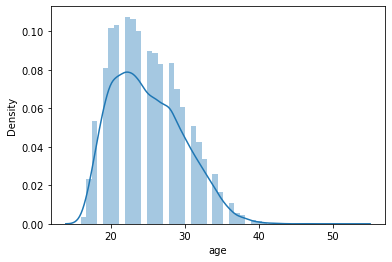

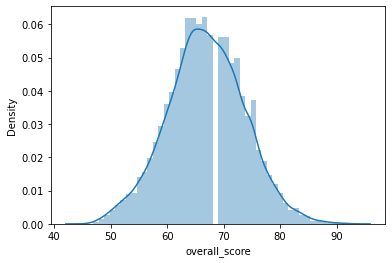

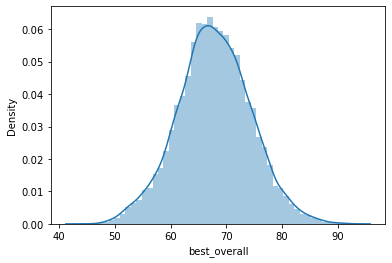

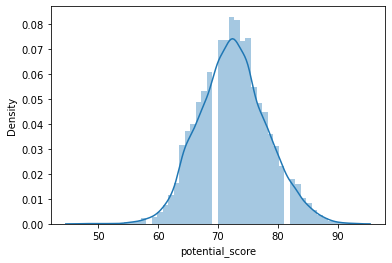

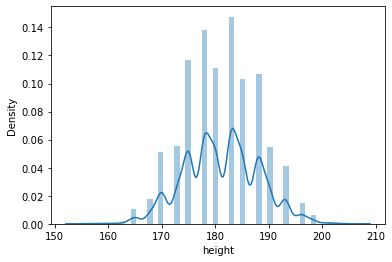

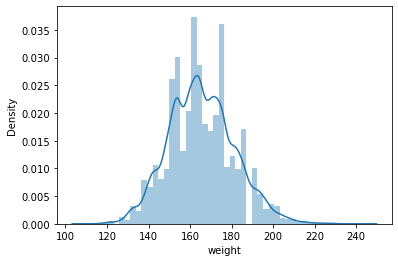

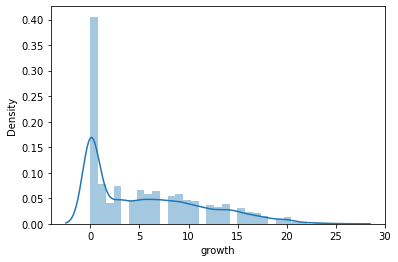

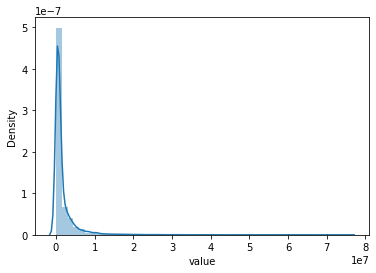

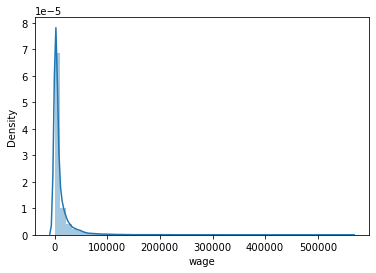

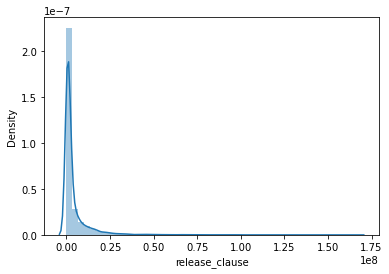

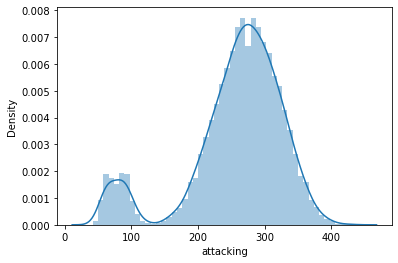

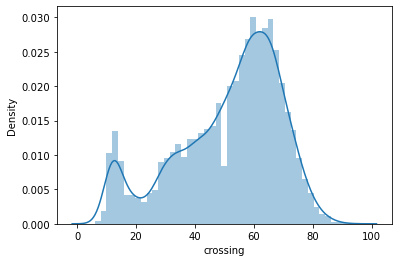

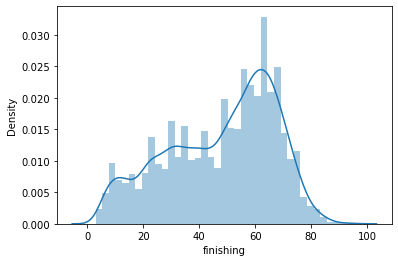

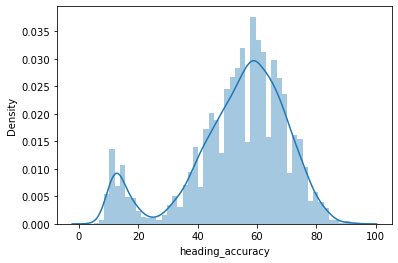

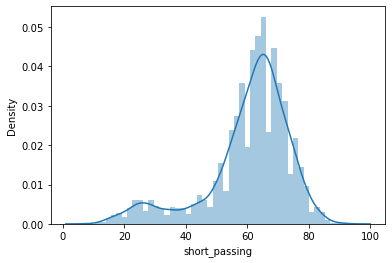

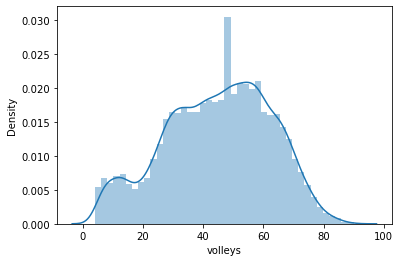

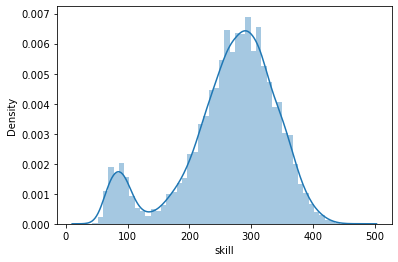

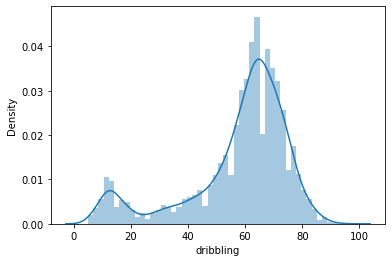

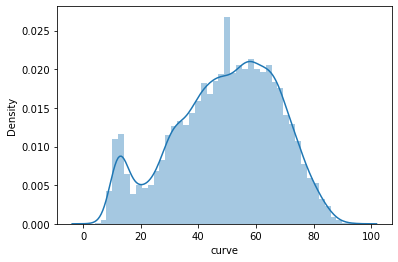

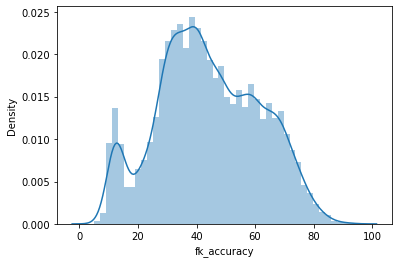

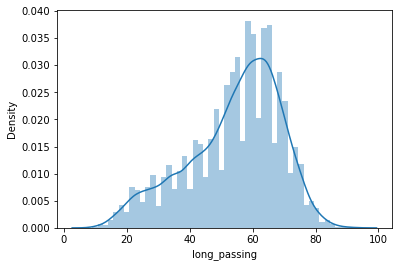

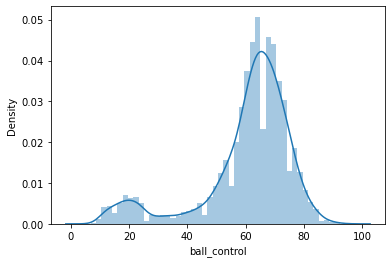

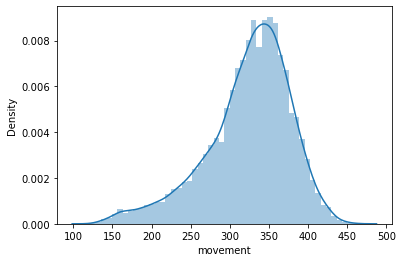

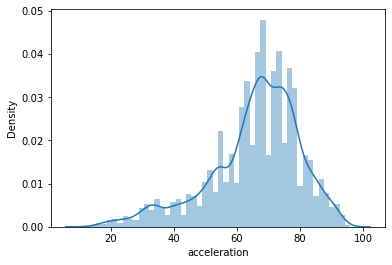

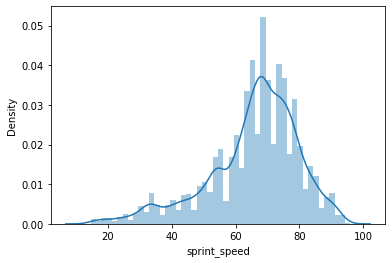

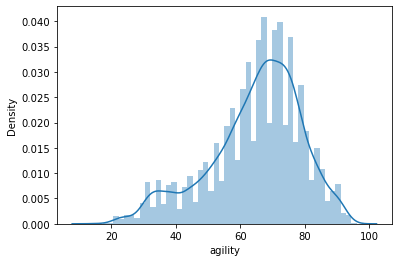

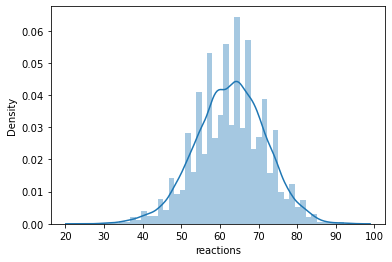

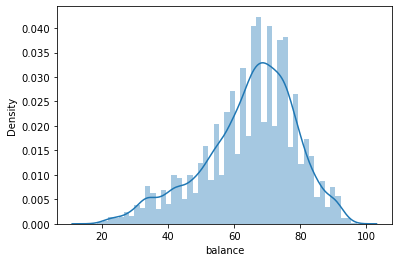

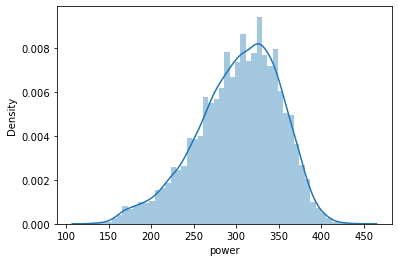

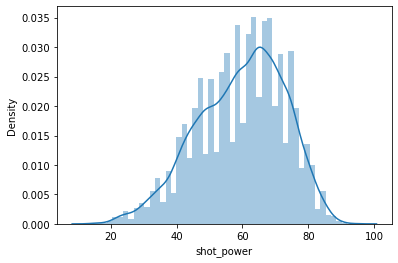

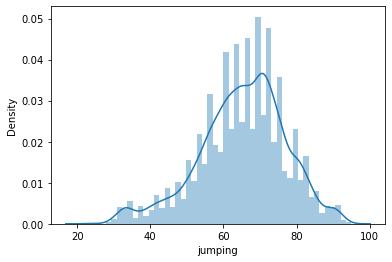

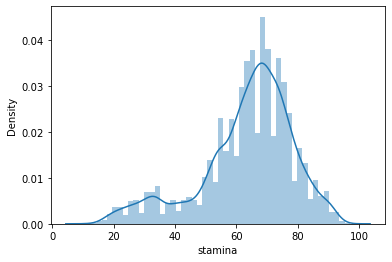

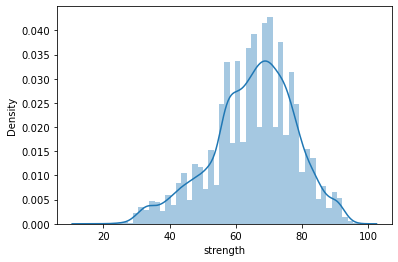

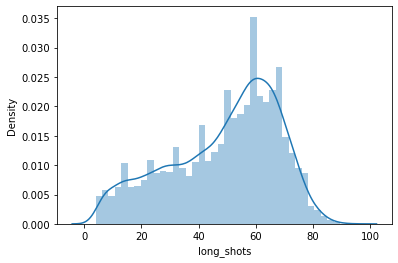

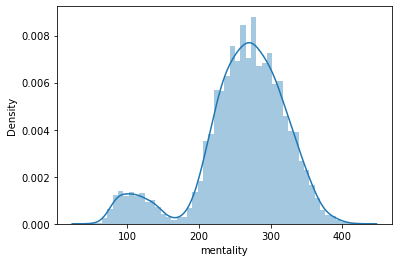

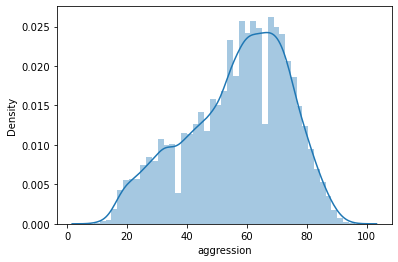

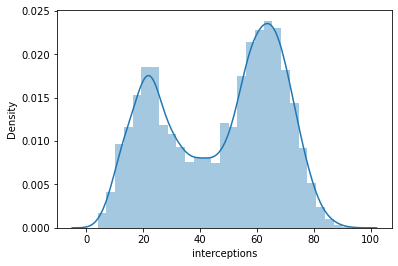

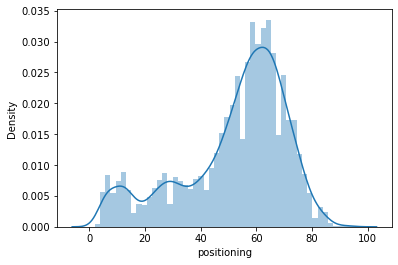

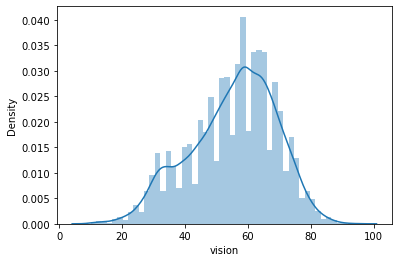

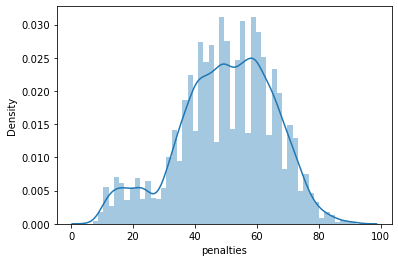

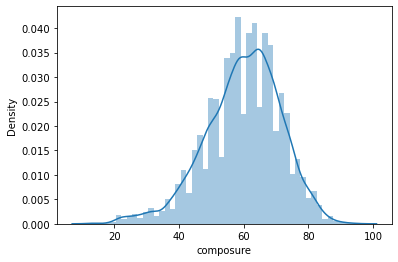

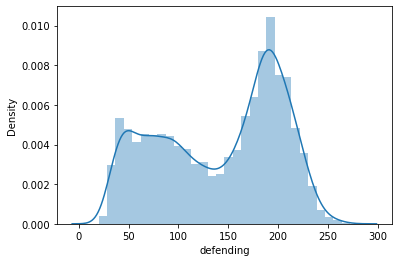

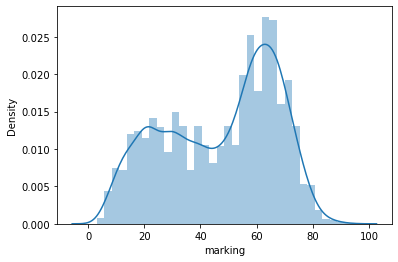

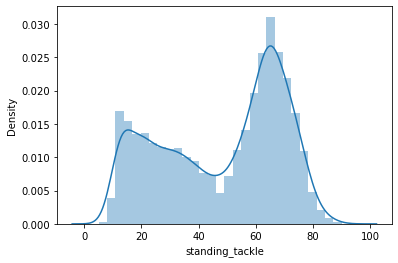

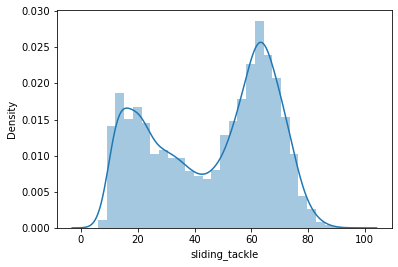

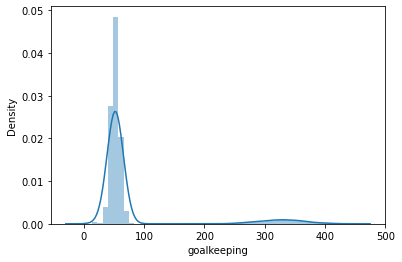

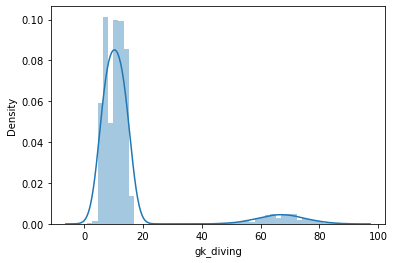

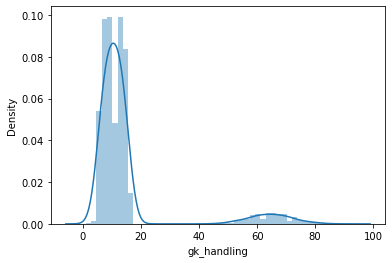

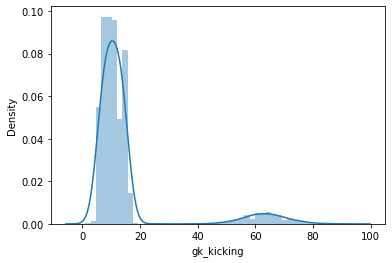

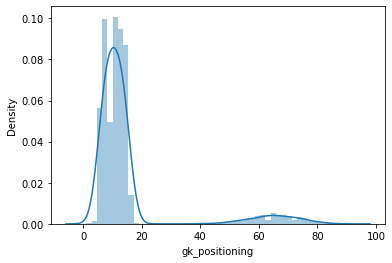

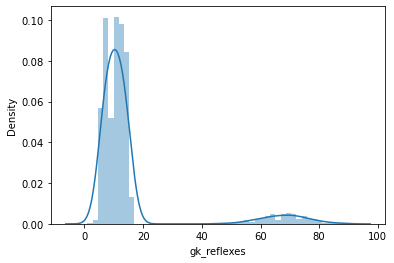

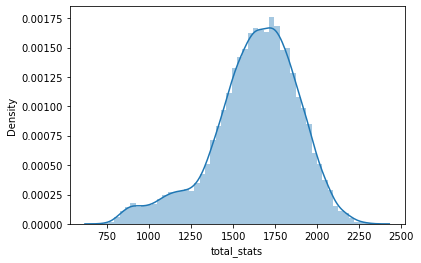

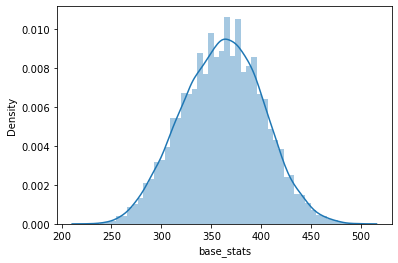

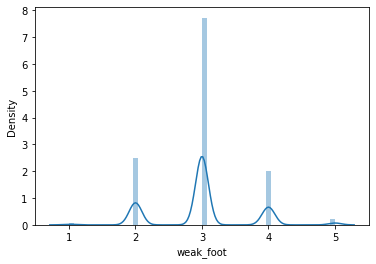

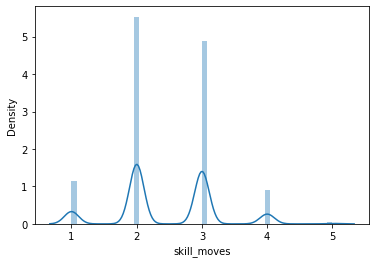

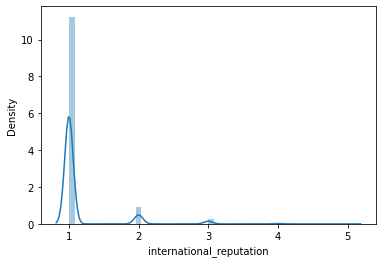

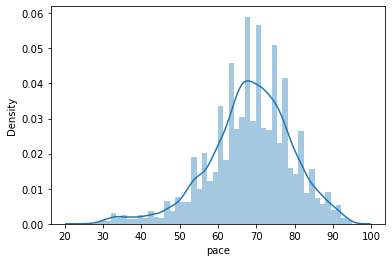

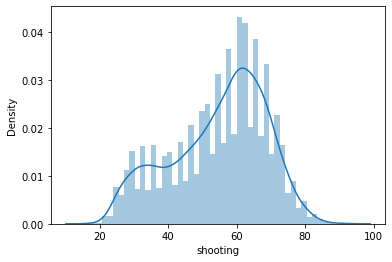

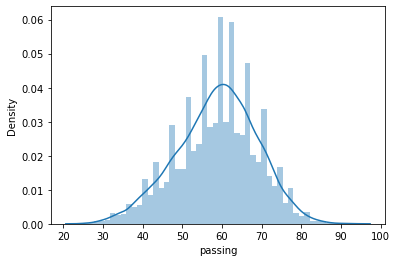

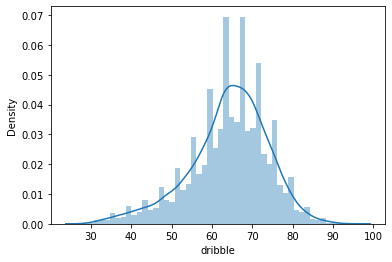

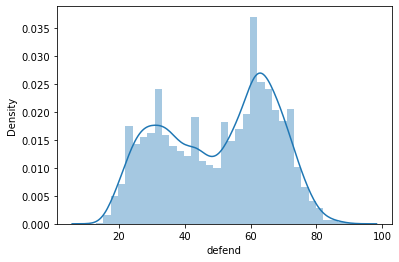

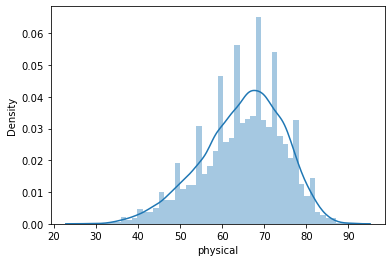

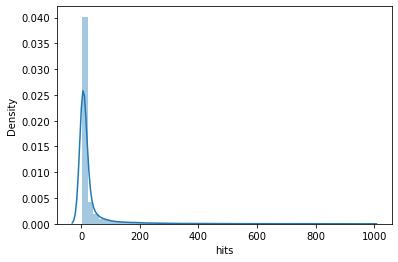

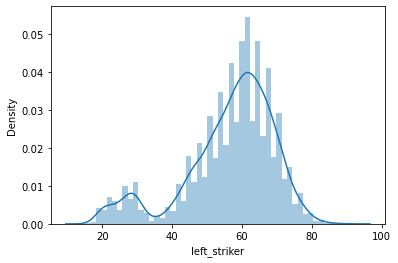

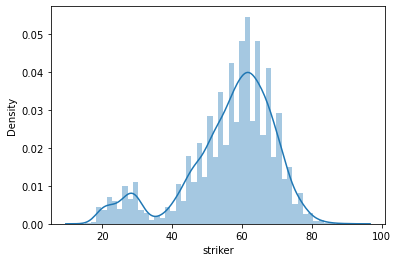

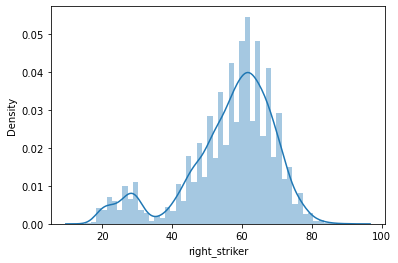

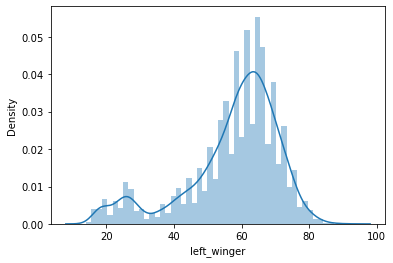

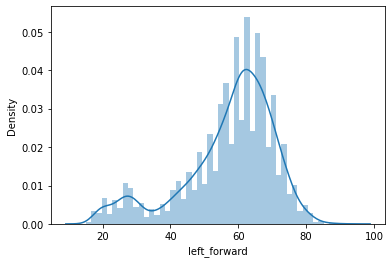

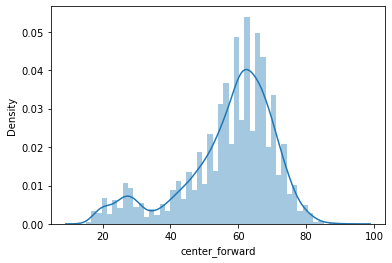

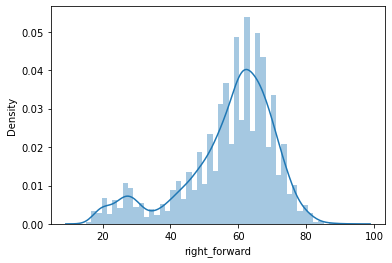

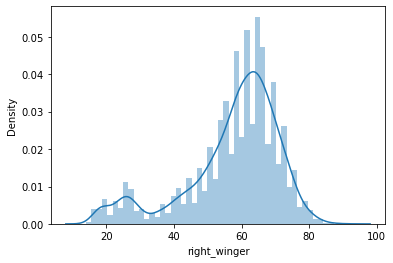

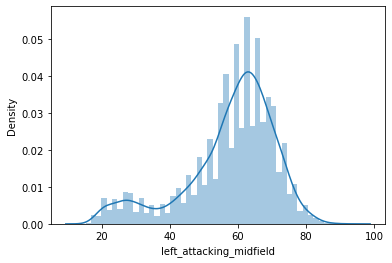

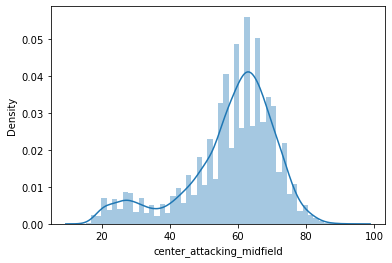

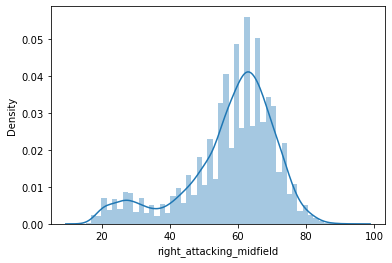

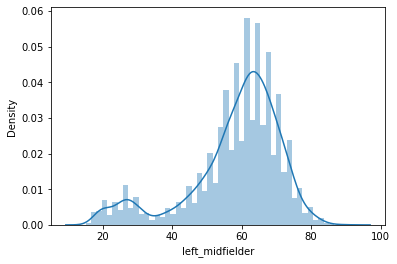

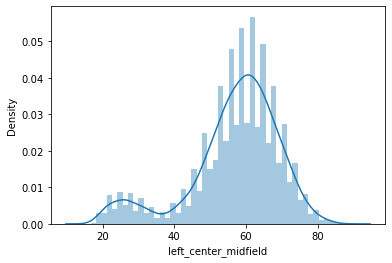

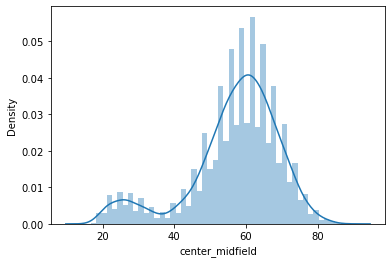

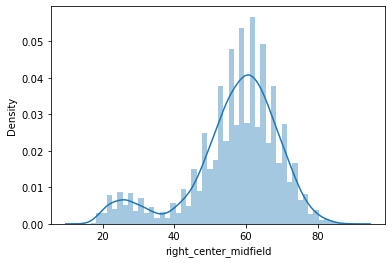

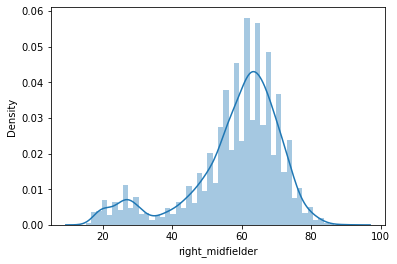

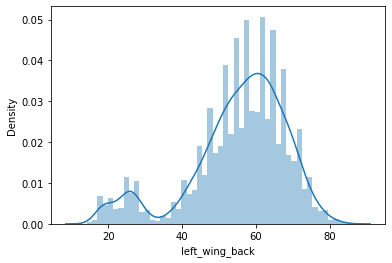

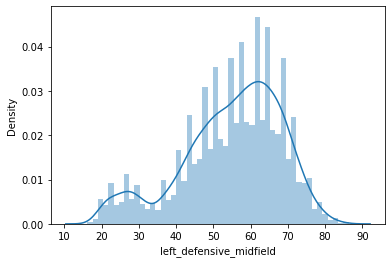

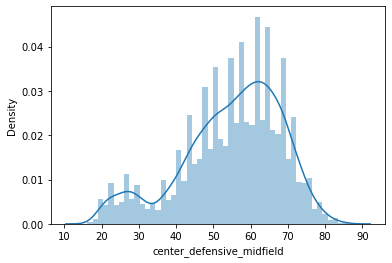

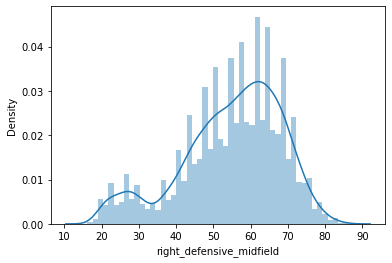

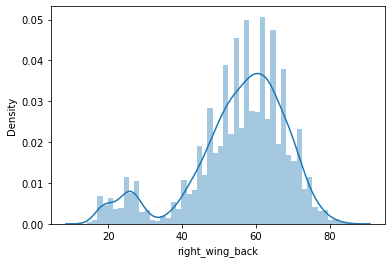

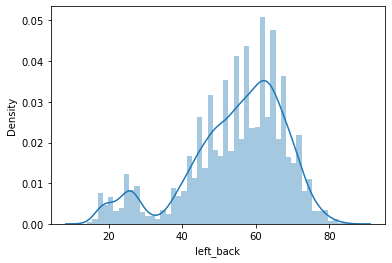

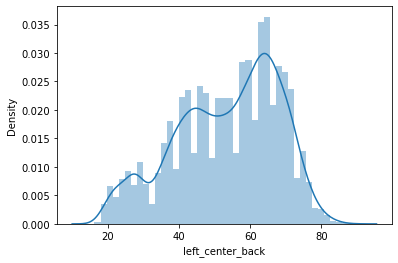

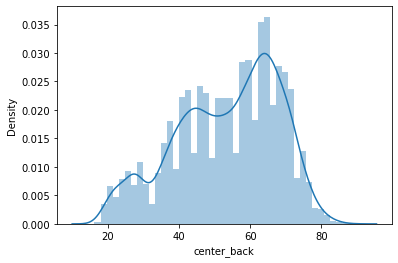

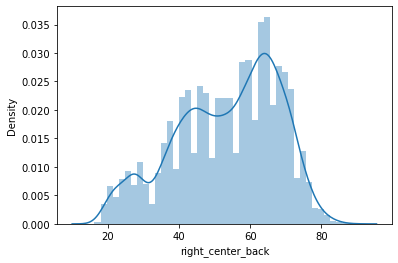

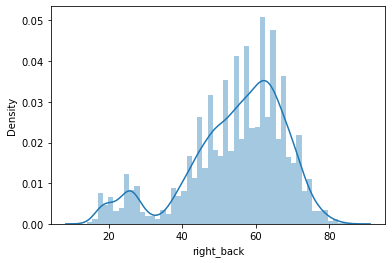

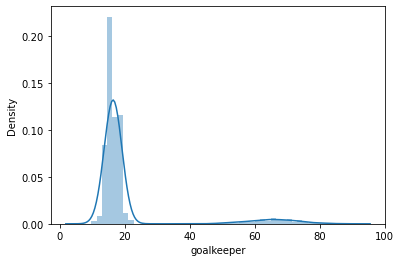

In [79]:
# we want to see the distributions
for column in num.columns:
    sns.distplot(data[column])
    plt.show()
# quite a few are actually Gaussian in shape but we'll normalize anyways and remove outliers

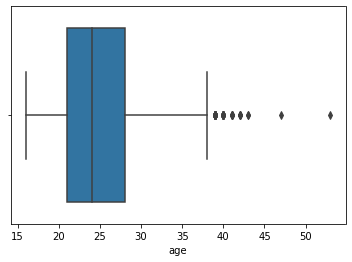

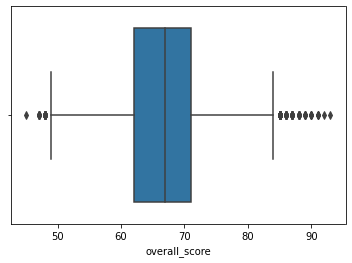

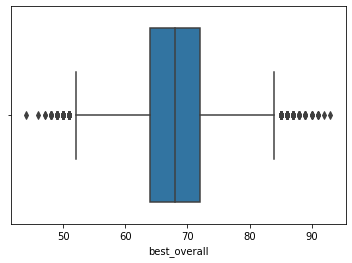

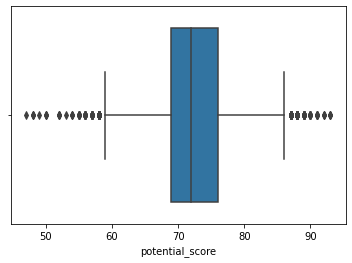

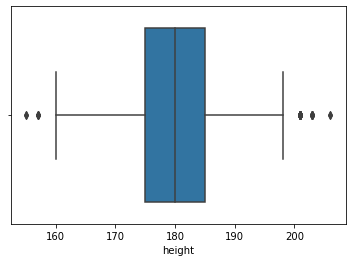

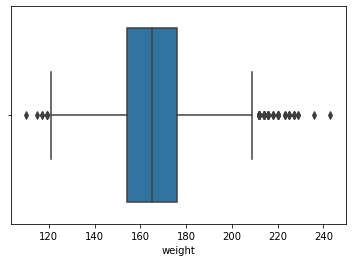

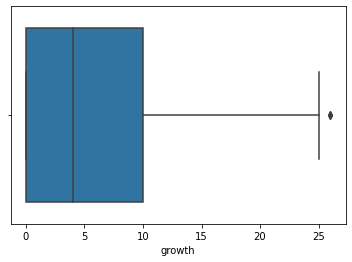

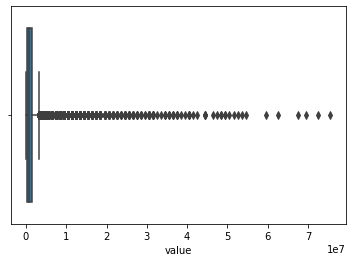

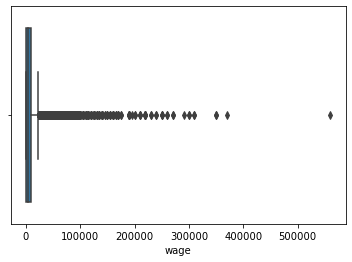

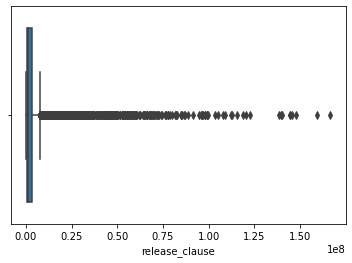

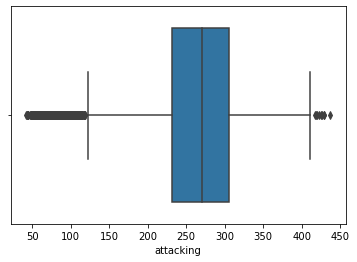

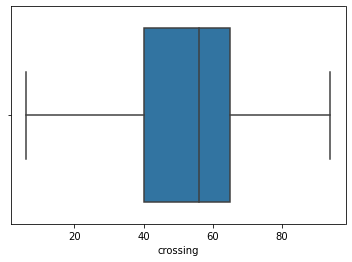

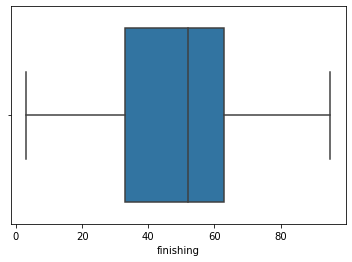

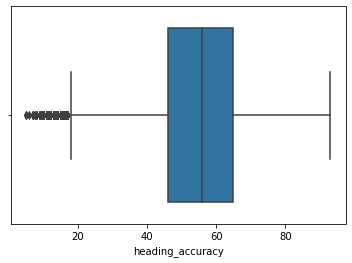

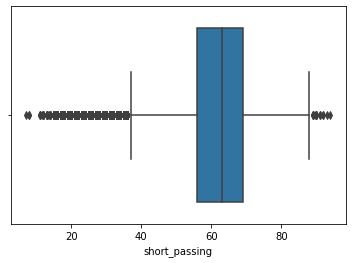

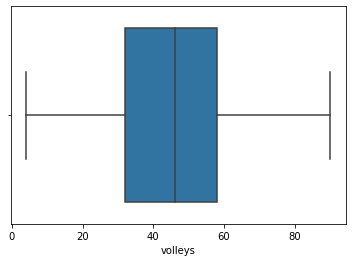

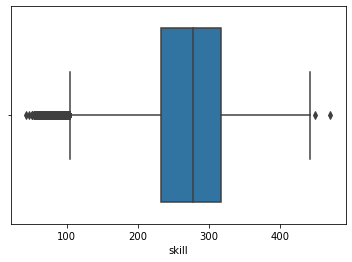

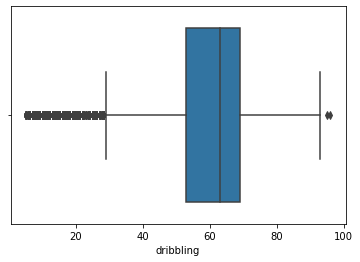

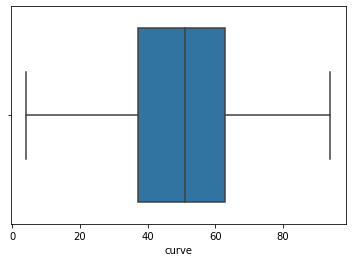

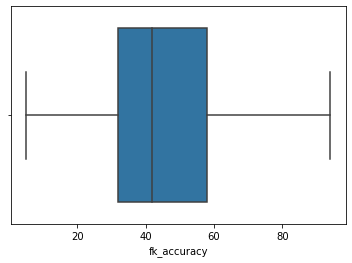

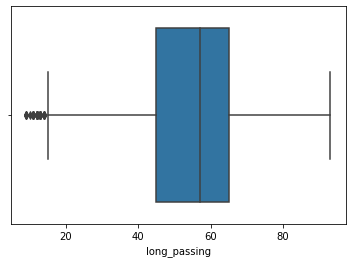

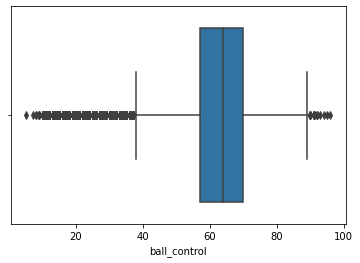

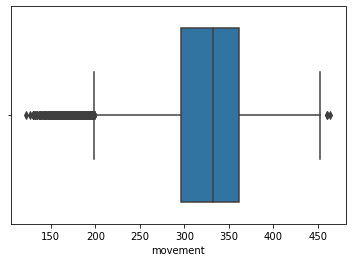

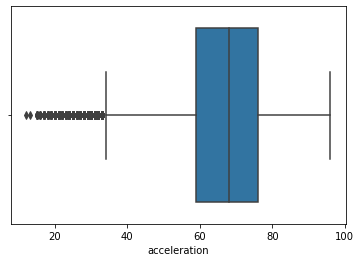

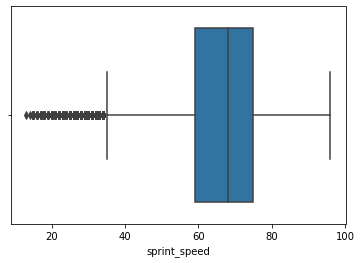

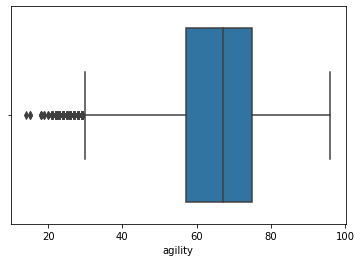

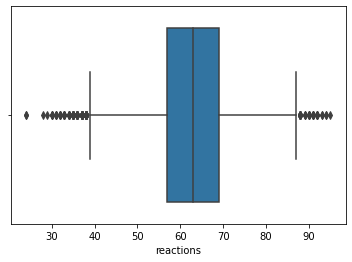

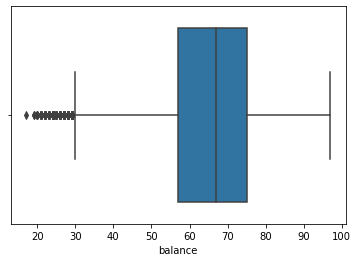

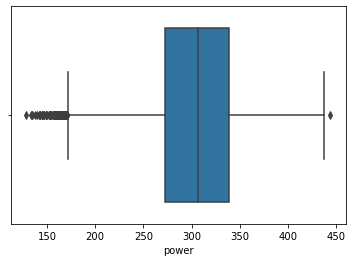

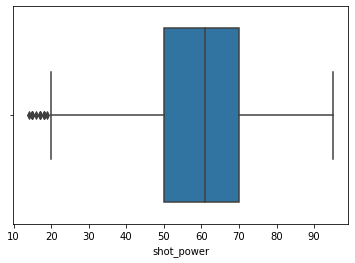

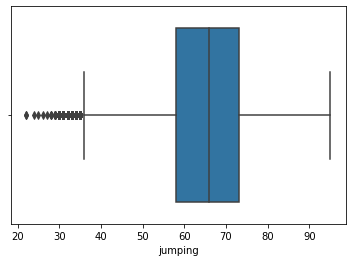

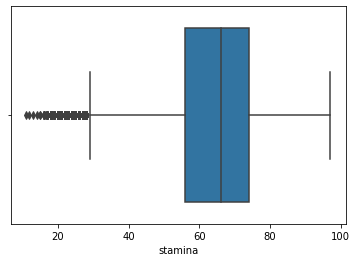

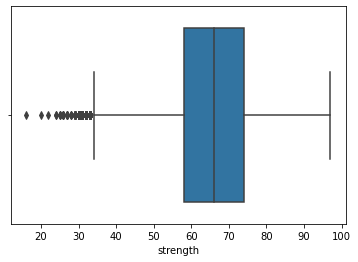

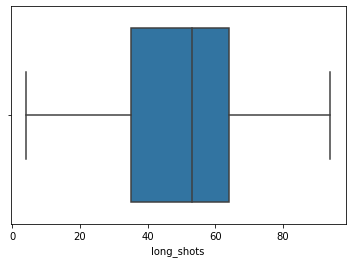

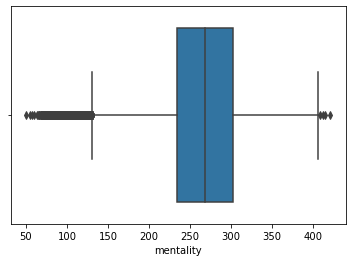

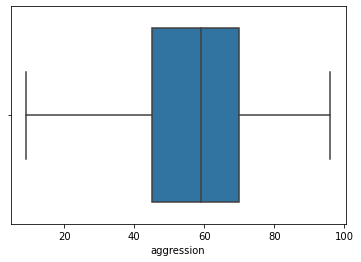

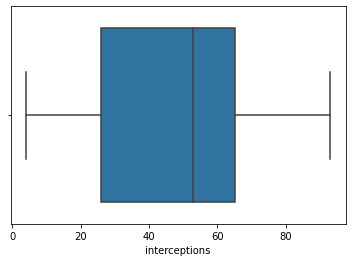

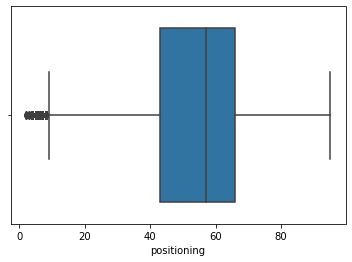

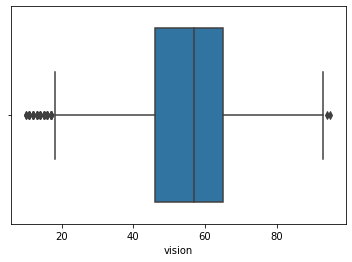

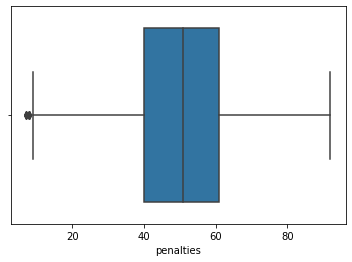

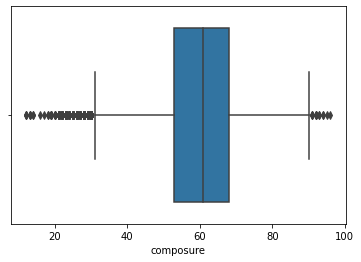

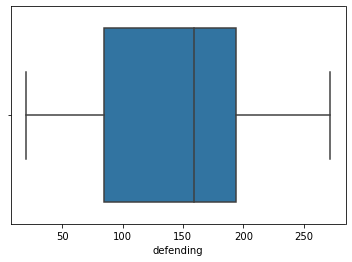

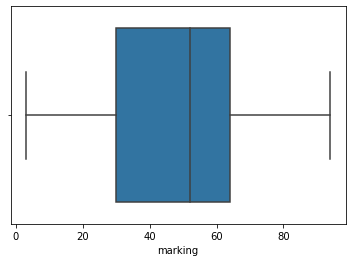

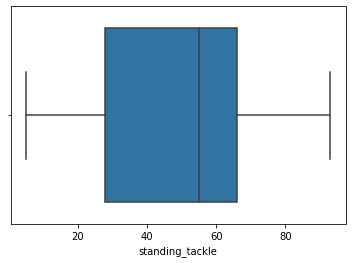

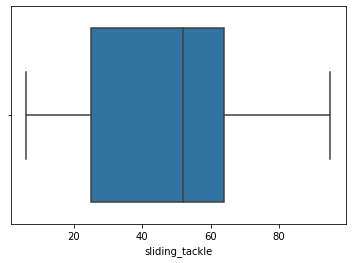

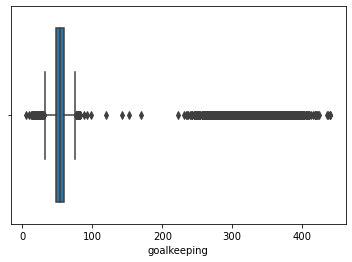

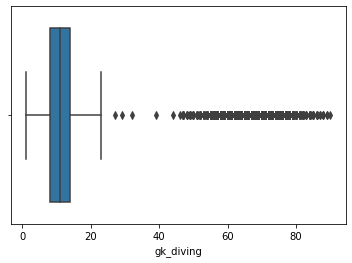

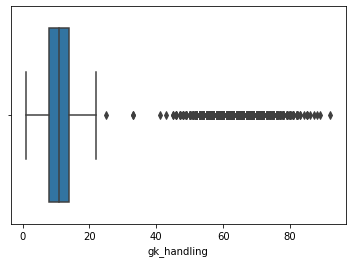

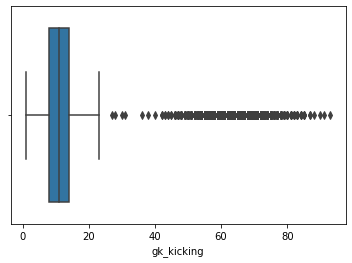

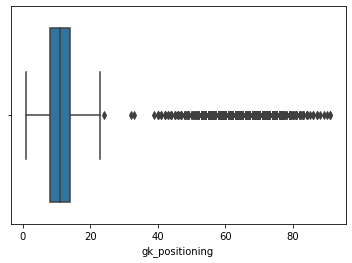

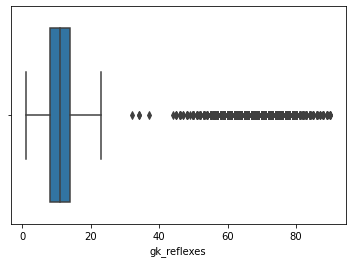

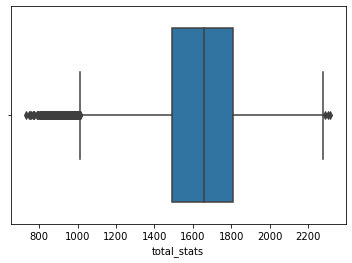

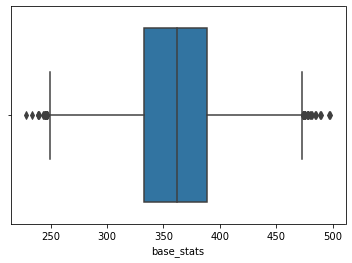

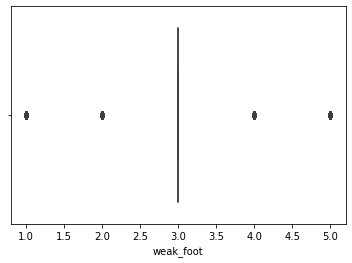

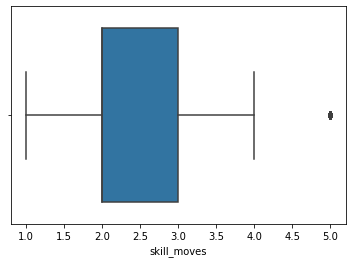

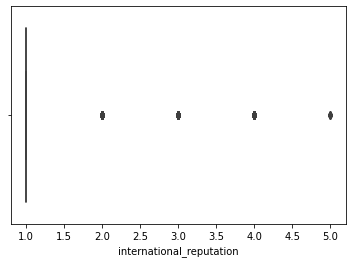

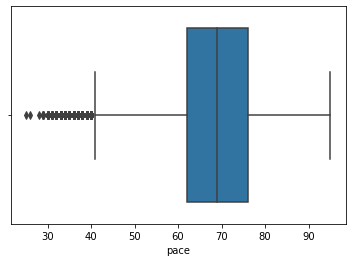

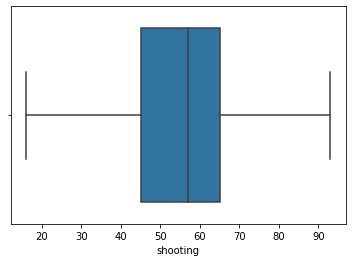

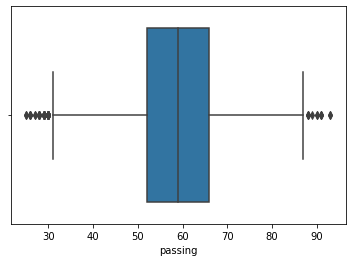

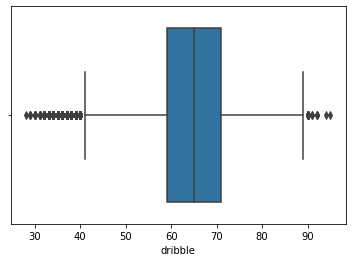

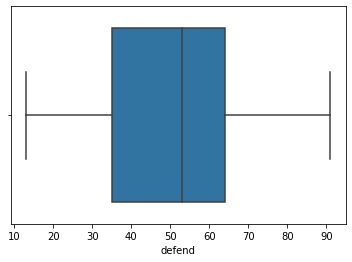

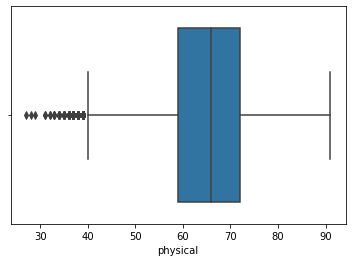

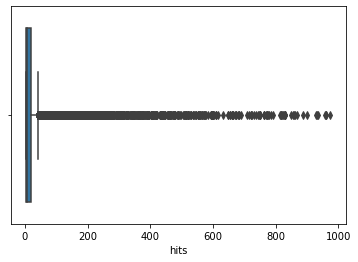

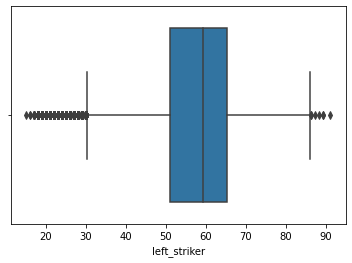

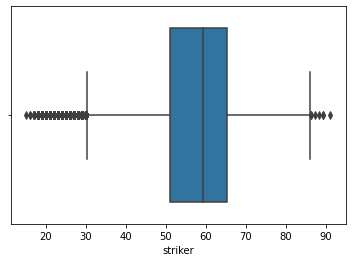

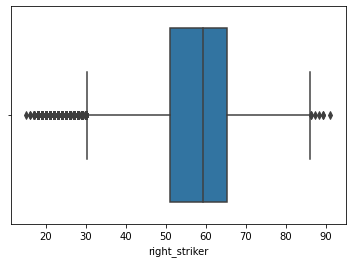

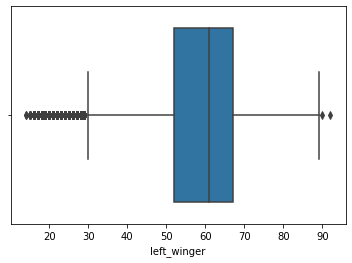

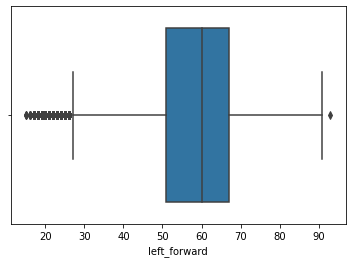

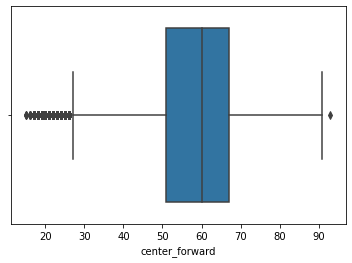

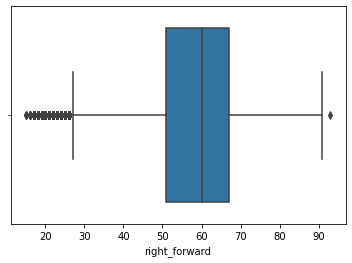

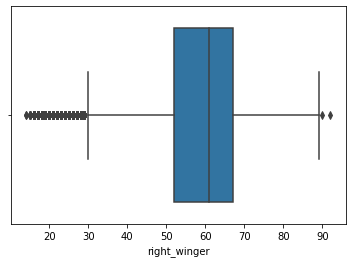

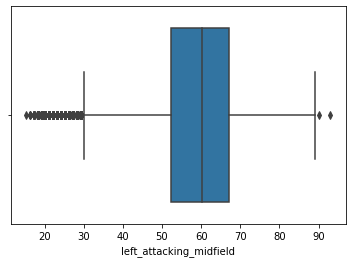

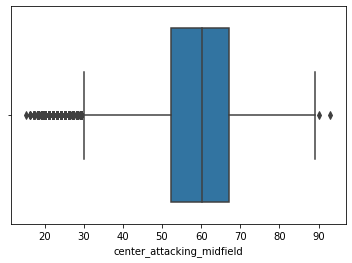

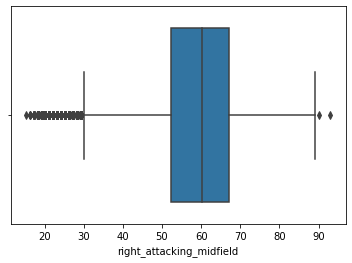

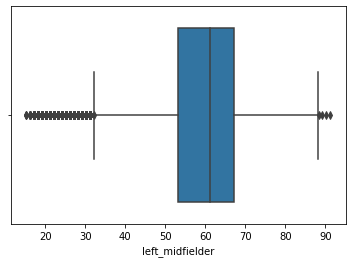

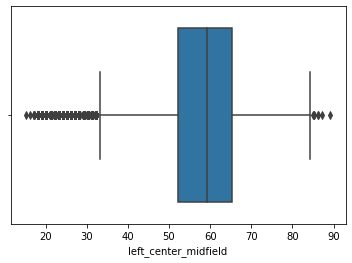

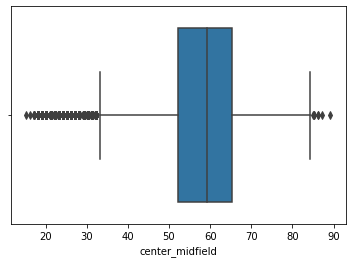

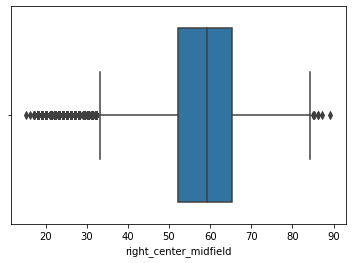

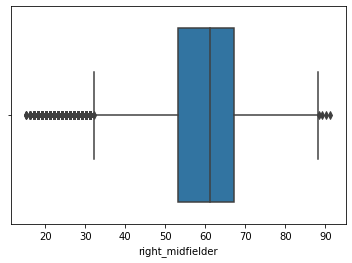

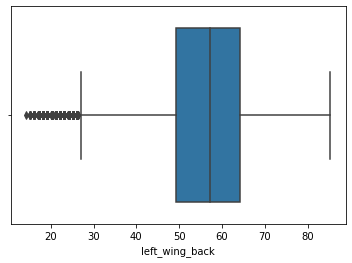

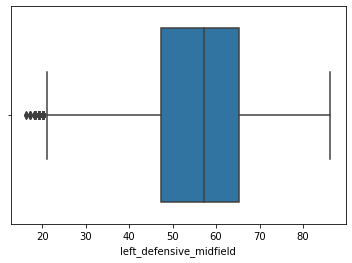

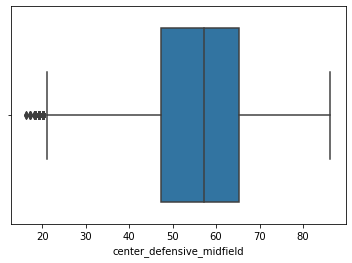

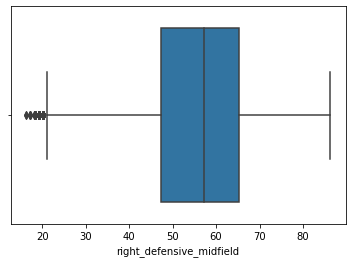

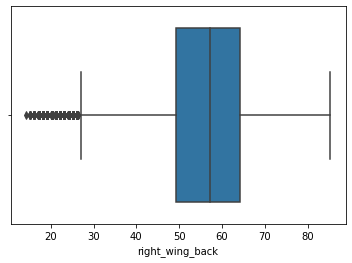

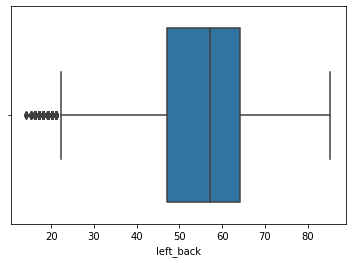

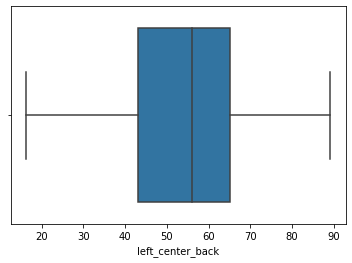

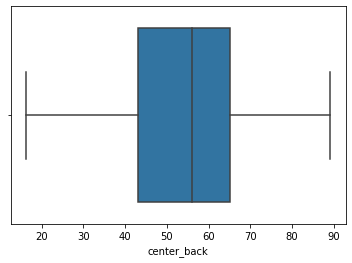

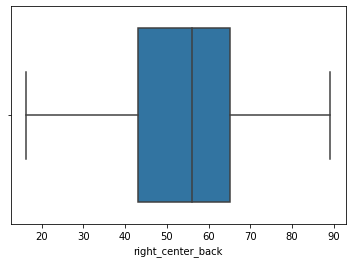

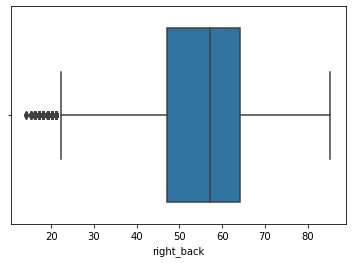

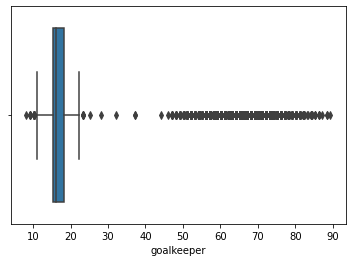

In [80]:
# Box-plot to better see the outliers
for column in num.columns:
    sns.boxplot(data[column])
    plt.show()

In [81]:
# Checking the correlations
data.corr()

age  overall_score  best_overall  potential_score  \
age                1.000000       0.532794      0.473163        -0.243885   
overall_score      0.532794       1.000000      0.986153         0.581683   
best_overall       0.473163       0.986153      1.000000         0.617532   
potential_score   -0.243885       0.581683      0.617532         1.000000   
height             0.086173       0.023611      0.013980        -0.022163   
...                     ...            ...           ...              ...   
left_center_back   0.214732       0.380052      0.404303         0.187956   
center_back        0.214732       0.380052      0.404303         0.187956   
right_center_back  0.214732       0.380052      0.404303         0.187956   
right_back         0.165092       0.410129      0.439683         0.239294   
goalkeeper         0.153191       0.101354      0.053878         0.032132   

                     height    weight    growth     value      wage  \
age                0.086173  0.246677 -0.864507  0.114551  0.214504   
overall_score      0.023611  0.151541 -0.610948  0.524616  0.592482   
best_overall       0.013980  0.134231 -0.559758  0.530365  0.592307   
potential_score   -0.022163 -0.037646  0.288580  0.452140  0.462231   
height             1.000000  0.764762 -0.049363  0.002311  0.024168   
...                     ...       ...       ...       ...       ...   
left_center_back  -0.026480  0.018790 -0.264421  0.181493  0.223471   
center_back       -0.026480  0.018790 -0.264421  0.181493  0.223471   
right_center_back -0.026480  0.018790 -0.264421  0.181493  0.223471   
right_back        -0.236406 -0.178607 -0.249858  0.212479  0.249021   
goalkeeper         0.348426  0.331263 -0.088029  0.042871  0.032344   

                   release_clause  attacking  crossing  finishing  \
age                      0.111683   0.194651  0.158620   0.115537   
overall_score            0.587733   0.431105  0.386543   0.302143   
best_overall             0.595972   0.465088  0.399290   0.335043   
potential_score          0.525400   0.228250  0.205953   0.164591   
height                   0.000806  -0.356338 -0.494260  -0.361692   
...                           ...        ...       ...        ...   
left_center_back         0.191522   0.490987  0.490392   0.106115   
center_back              0.191522   0.490987  0.490392   0.106115   
right_center_back        0.191522   0.490987  0.490392   0.106115   
right_back               0.228762   0.649644  0.699249   0.290707   
goalkeeper               0.049355  -0.736962 -0.626632  -0.557084   

                   heading_accuracy  short_passing   volleys     skill  \
age                        0.175331       0.188170  0.190971  0.180440   
overall_score              0.302952       0.492405  0.358549  0.442149   
best_overall               0.335055       0.533657  0.384956  0.474795   
potential_score            0.131816       0.311090  0.171103  0.260452   
height                     0.059936      -0.354072 -0.335333 -0.456269   
...                             ...            ...       ...       ...   
left_center_back           0.702812       0.665275  0.194483  0.500574   
center_back                0.702812       0.665275  0.194483  0.500574   
right_center_back          0.702812       0.665275  0.194483  0.500574   
right_back                 0.666688       0.795340  0.359995  0.686507   
goalkeeper                -0.698327      -0.689614 -0.549985 -0.682452   

                   dribbling     curve  fk_accuracy  long_passing  \
age                 0.057032  0.186751     0.223700      0.230394   
overall_score       0.350779  0.397155     0.367422      0.482643   
best_overall        0.388122  0.417460     0.386015      0.515991   
potential_score     0.255830  0.216307     0.161960      0.279227   
height             -0.484283 -0.441485    -0.402832     -0.315867   
...                      ...       ...          ...           ...   
left_center_back    0.418106  0.351124     0.

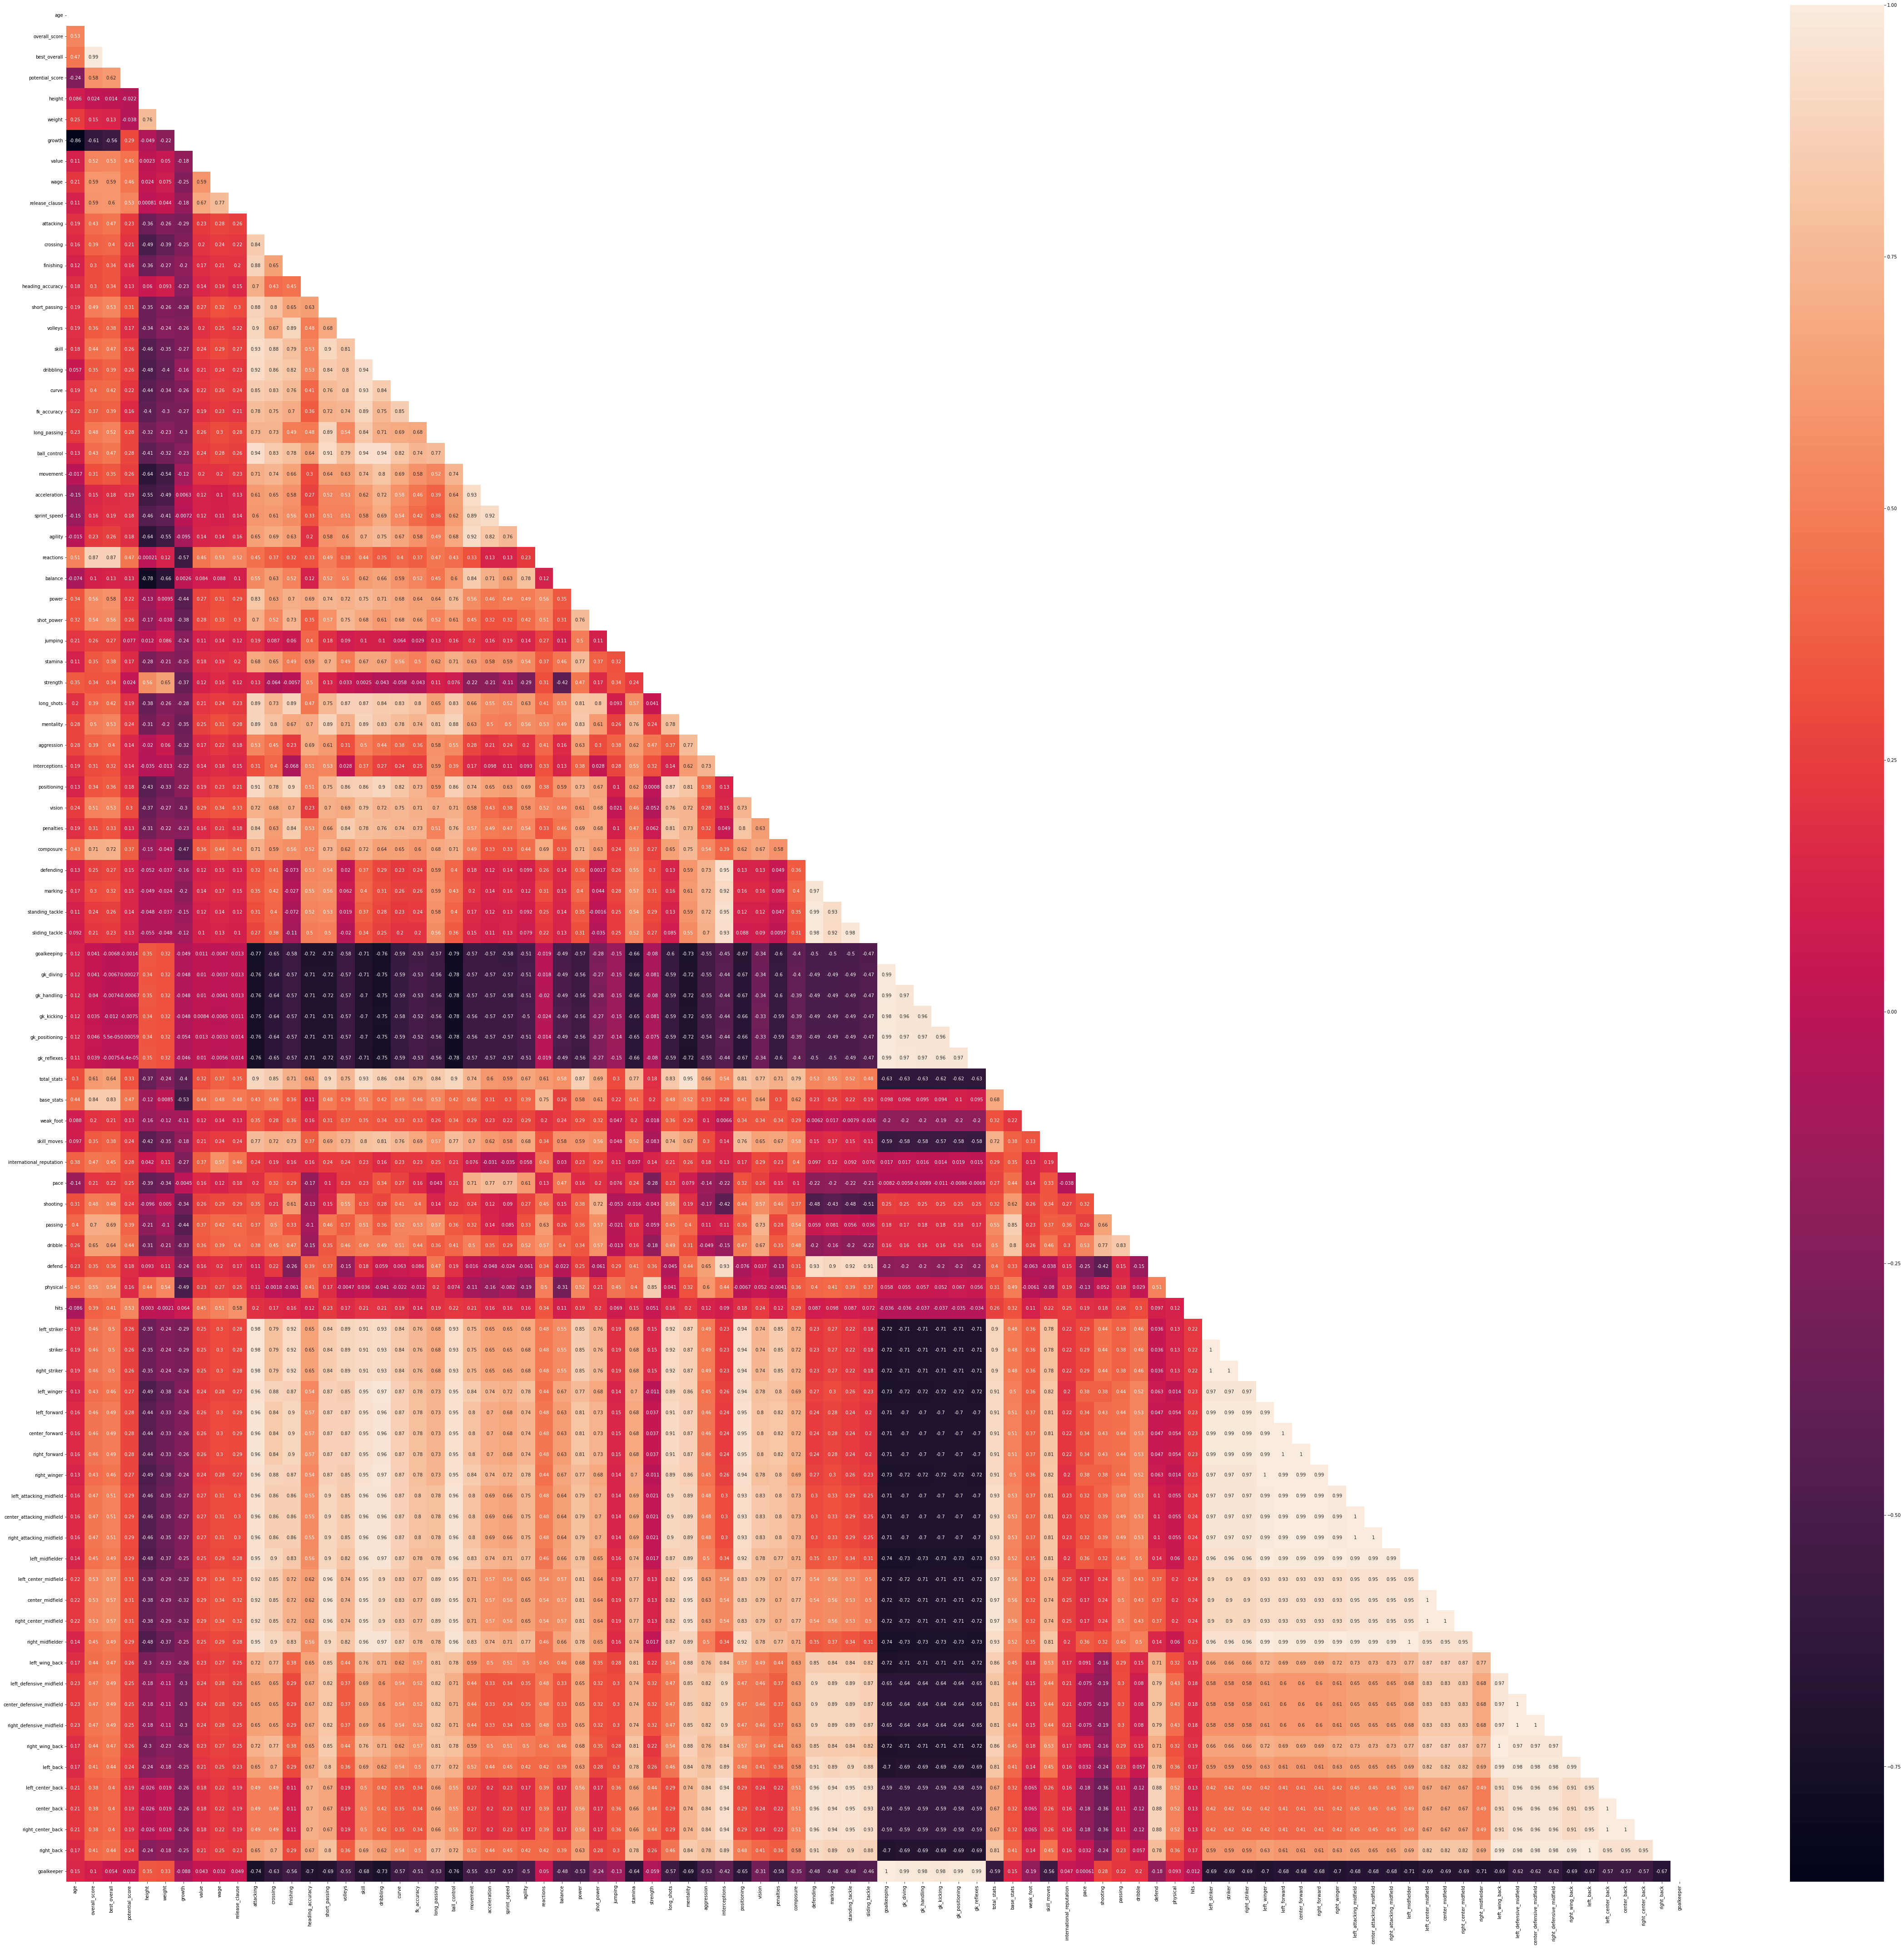

In [82]:
#HEATMAP
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(80, 76))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

# first observations:
# value, wage and release clause highly correlated to each other (around 0.6)
# postions very highly correlated (>0.95) to stats that fit positions, ie. attacking positions corrlated to attacking stats
  # => for the future rounds: 
    # positions and stats are highly correlated data:
    # repetition of exogenous variables can twist the model, will probably be dropped